Ref:https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html

In [455]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
import statistics as stats

### Load image

(2287, 440, 3)

<Figure size 1440x2880 with 0 Axes>

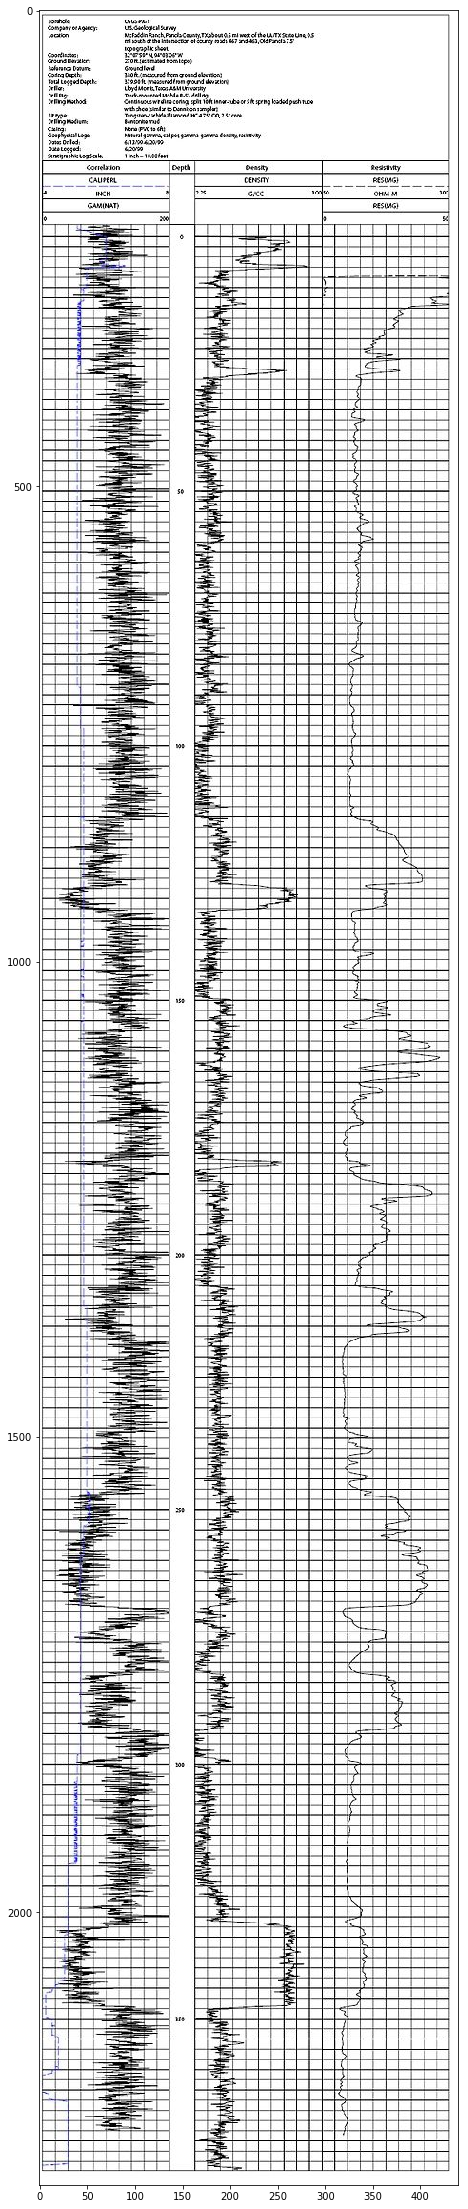

In [16]:
src = cv2.imread('../data/fieldprint.jpg'); src.shape
###
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. 
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
# The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB
###

plt.figure(figsize=(20,40))
_ = plt.imshow(src)

### BGR to Gray scale

In [18]:
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
else:
    gray = src

<Figure size 1440x2880 with 0 Axes>

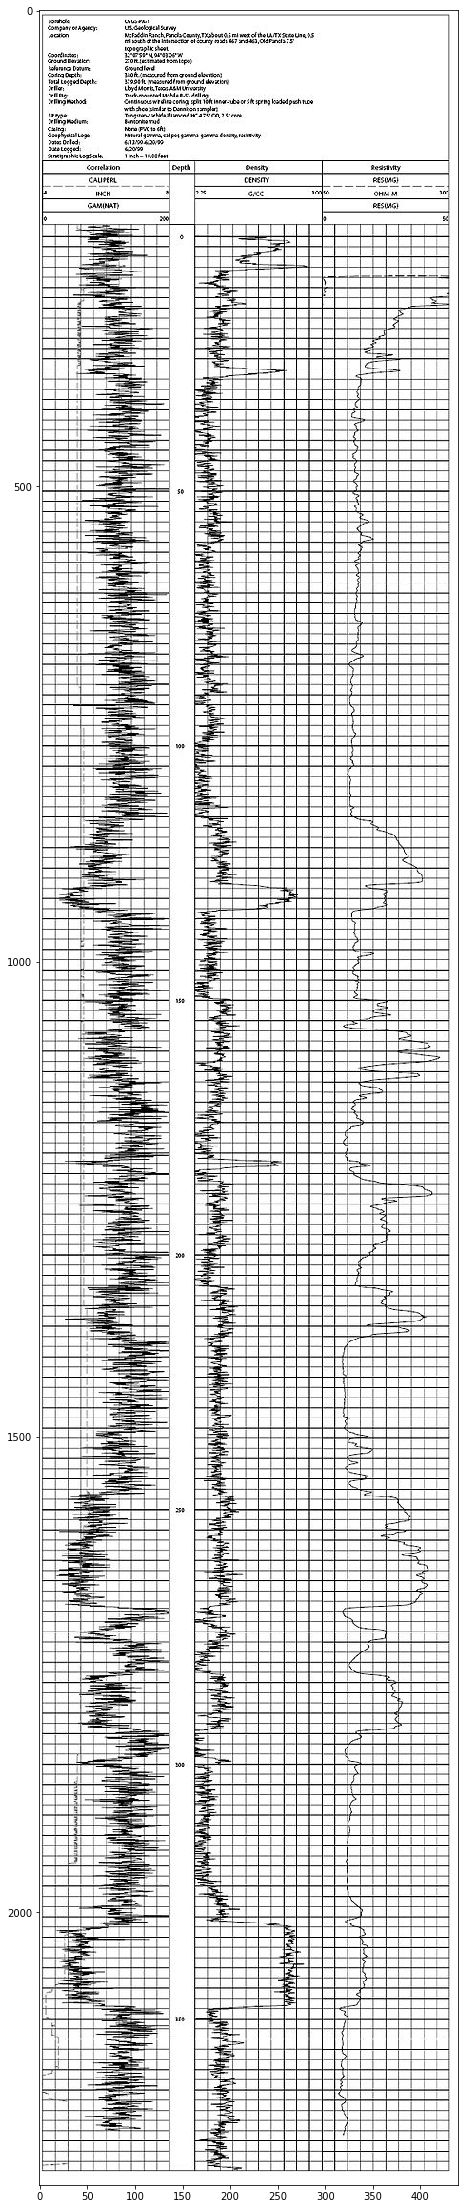

In [21]:
plt.figure(figsize=(20,40))
_ = plt.imshow(gray, cmap='gray')

### Gray scale to Binary

In [22]:
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

<Figure size 1440x2880 with 0 Axes>

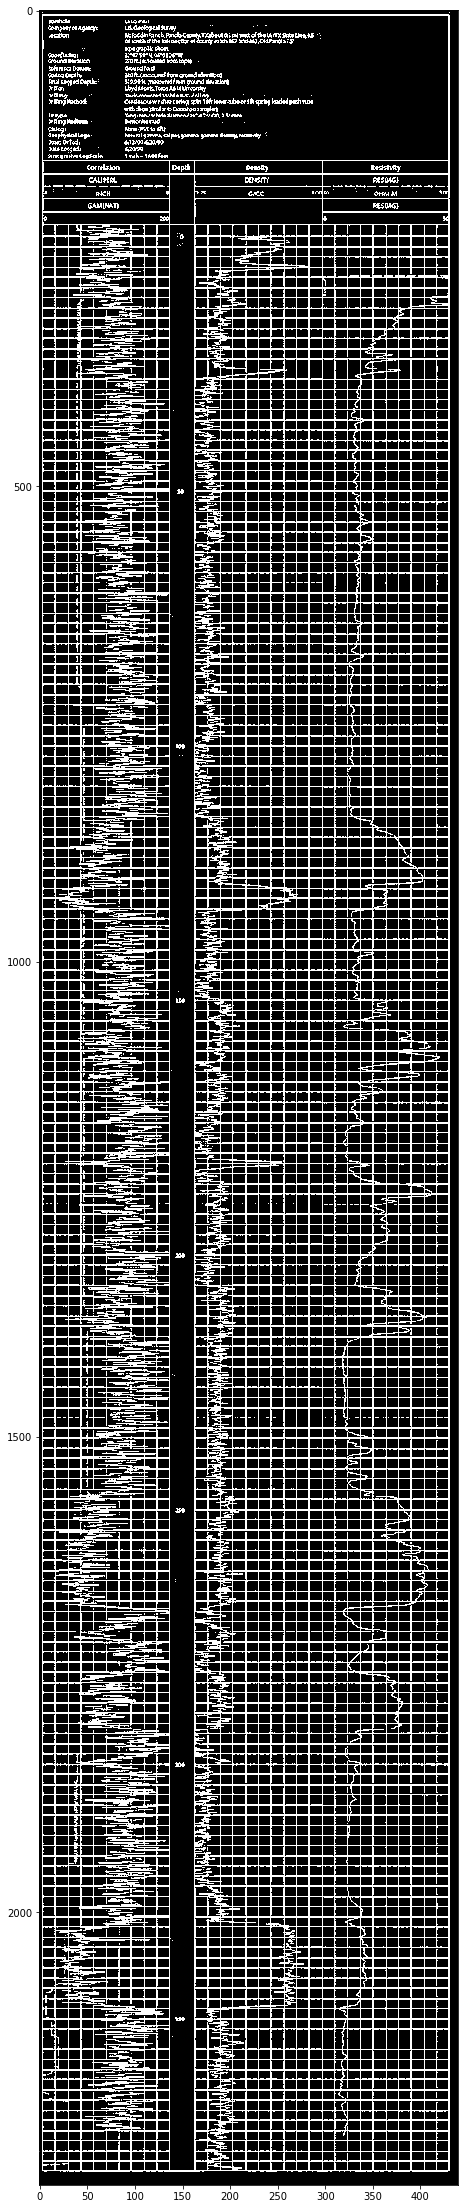

In [29]:
plt.figure(figsize=(20,40))
_ = plt.imshow(bw, cmap='gray')

### Remove salt and pepper noise

<Figure size 1440x2880 with 0 Axes>

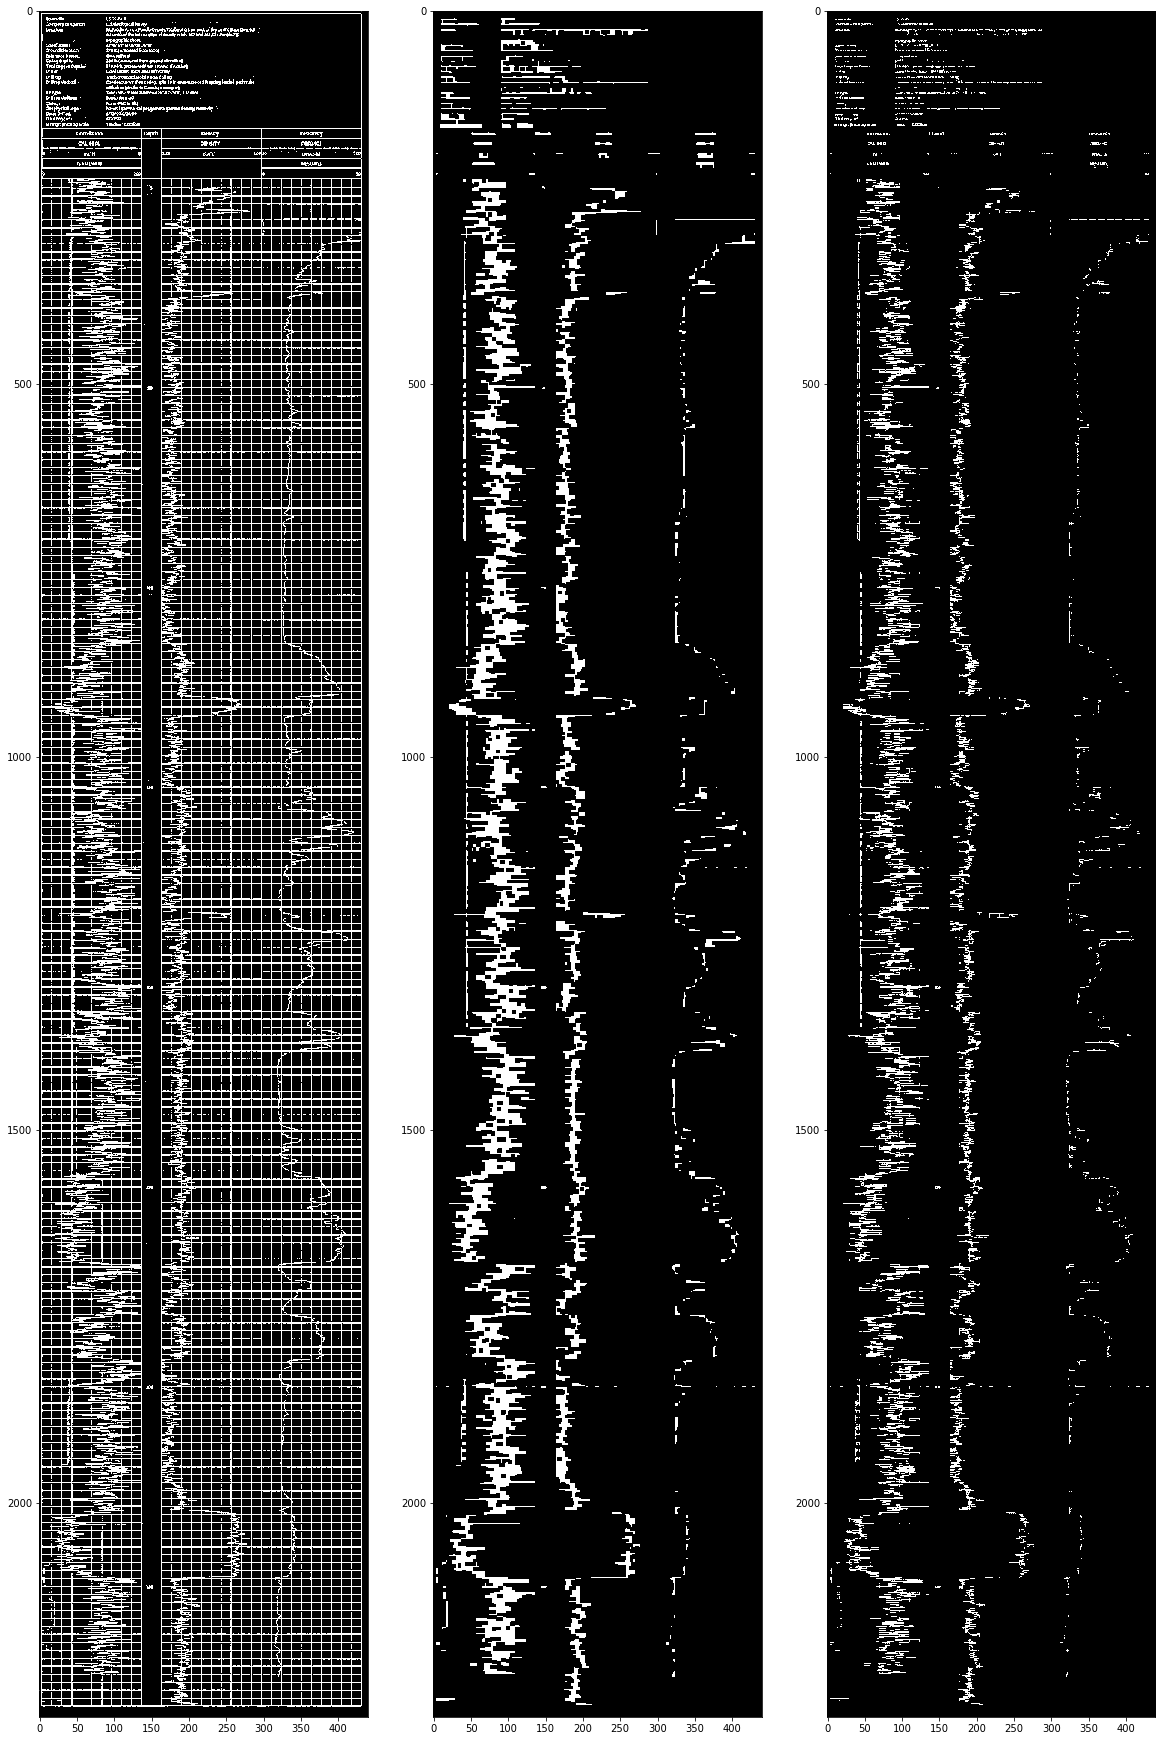

In [432]:
new = np.copy(bw)

kernel = np.ones((3,3),np.uint8)

plt.figure(figsize=(20,40))

_ = plt.subplot(1,3,1)
_ = plt.imshow(new, cmap='gray')

new = cv2.dilate(new, kernel, iterations=1)
new = cv2.erode(new, kernel, iterations=2)

_ = plt.subplot(1,3,2)
_ = plt.imshow(new, cmap='gray')

new = new * bw

_ = plt.subplot(1,3,3)
_ = plt.imshow(new, cmap='gray')

### Specify Structural Element: Horizontal

In [263]:
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw); horizontal.shape
vertical = np.copy(bw)

(2287, 440)

In [264]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
#horizontal_size = cols // 10; horizontal_size
horizontal_size = 20

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure, iterations=2)
horizontal = cv2.dilate(horizontal, horizontalStructure, iterations=2)

<Figure size 1440x2880 with 0 Axes>

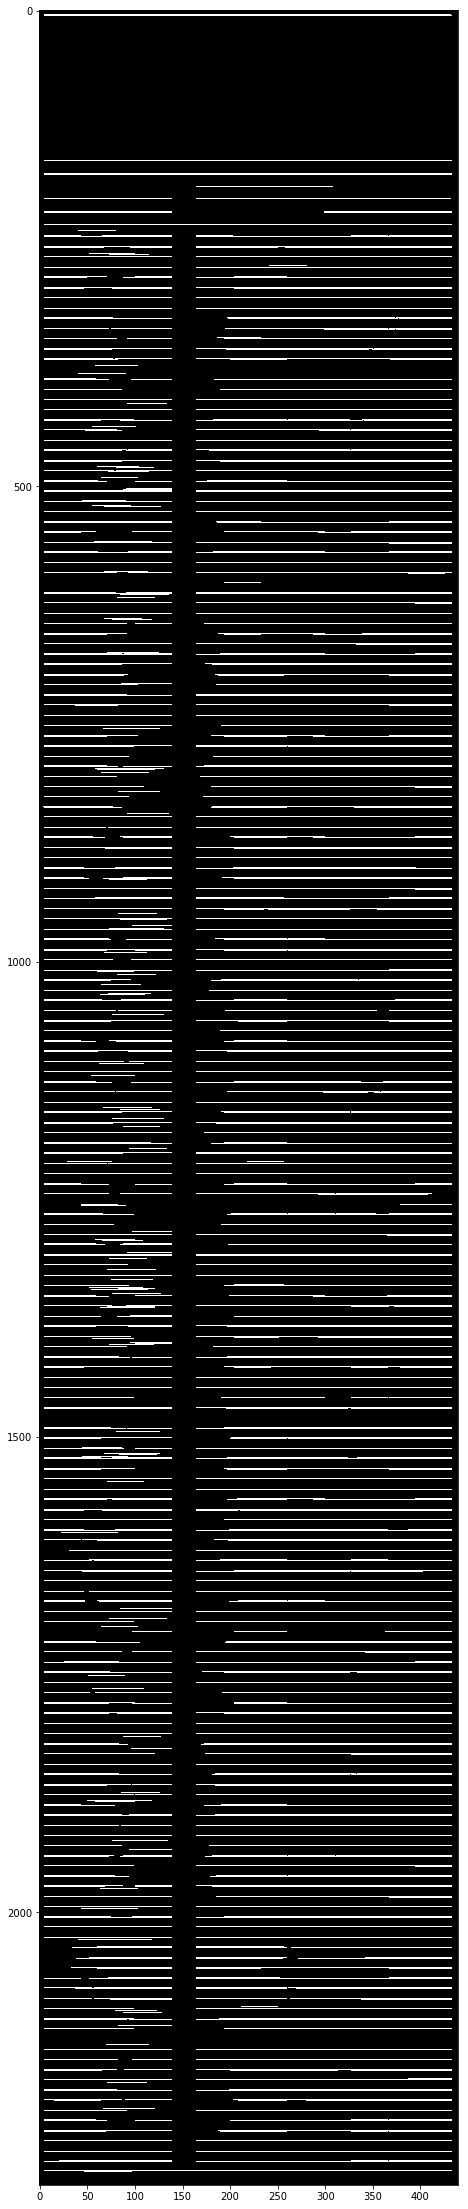

In [265]:
plt.figure(figsize=(20,40))
_ = plt.imshow(horizontal, cmap='gray')

### Specify Structural Element: Vertical

In [266]:
# Specify size on vertical axis
rows = vertical.shape[0]; rows
#vertical_size = rows // 200; vertical_size
vertical_size = 10

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure, iterations=2)
vertical = cv2.dilate(vertical, verticalStructure, iterations=2)

2287

<Figure size 1440x2880 with 0 Axes>

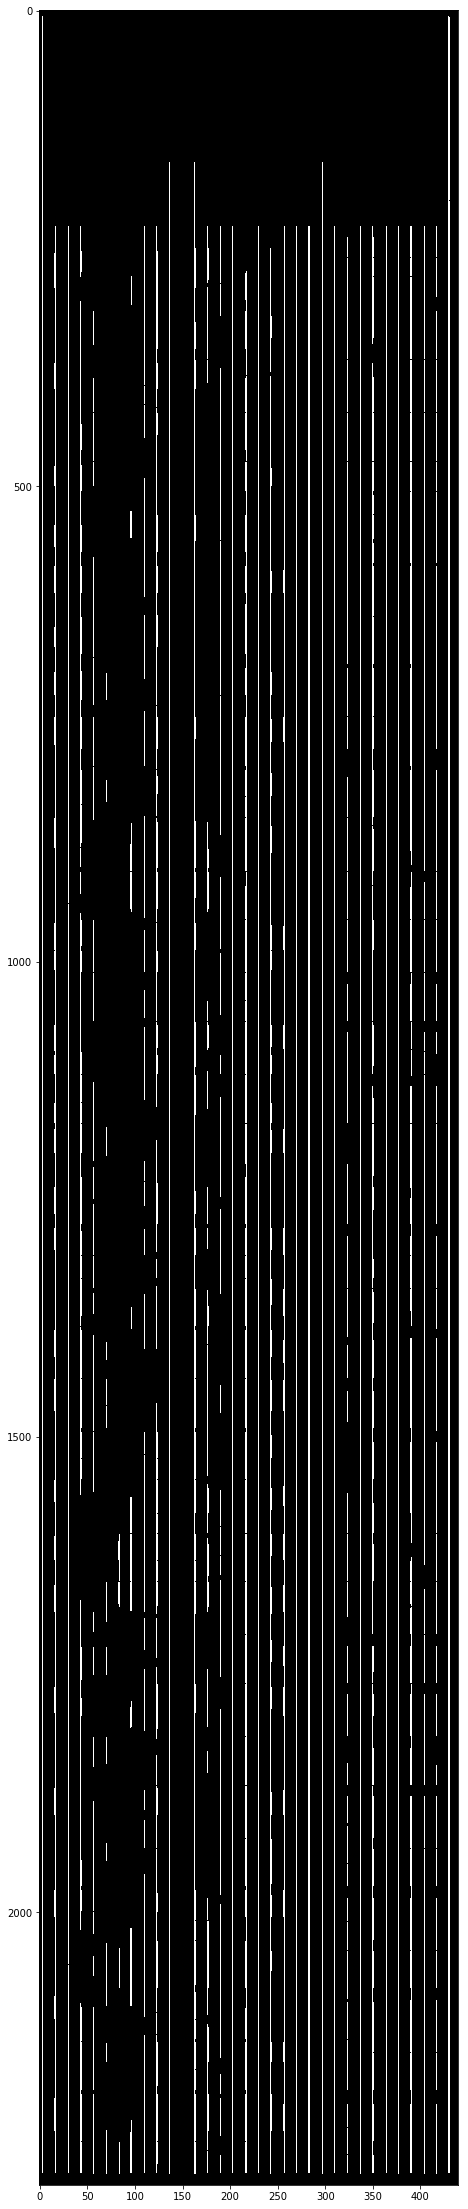

In [267]:
plt.figure(figsize=(20,40))
_ = plt.imshow(vertical, cmap='gray')

### Create a vertical and horizontal mask

In [268]:
vertical_mask_bool = vertical==255 # True
vertical_mask_invert_bool = np.invert(vertical_mask_bool)

In [269]:
horizontal_mask_bool = horizontal==255 # True
horizontal_mask_invert_bool = np.invert(horizontal_mask_bool)

### Remove vertical and horizontal lines with vertical mask

In [270]:
new_hor = bw * horizontal_mask_invert_bool
new_ver = bw * vertical_mask_invert_bool
new = bw * vertical_mask_invert_bool * horizontal_mask_invert_bool

<Figure size 1440x2880 with 0 Axes>

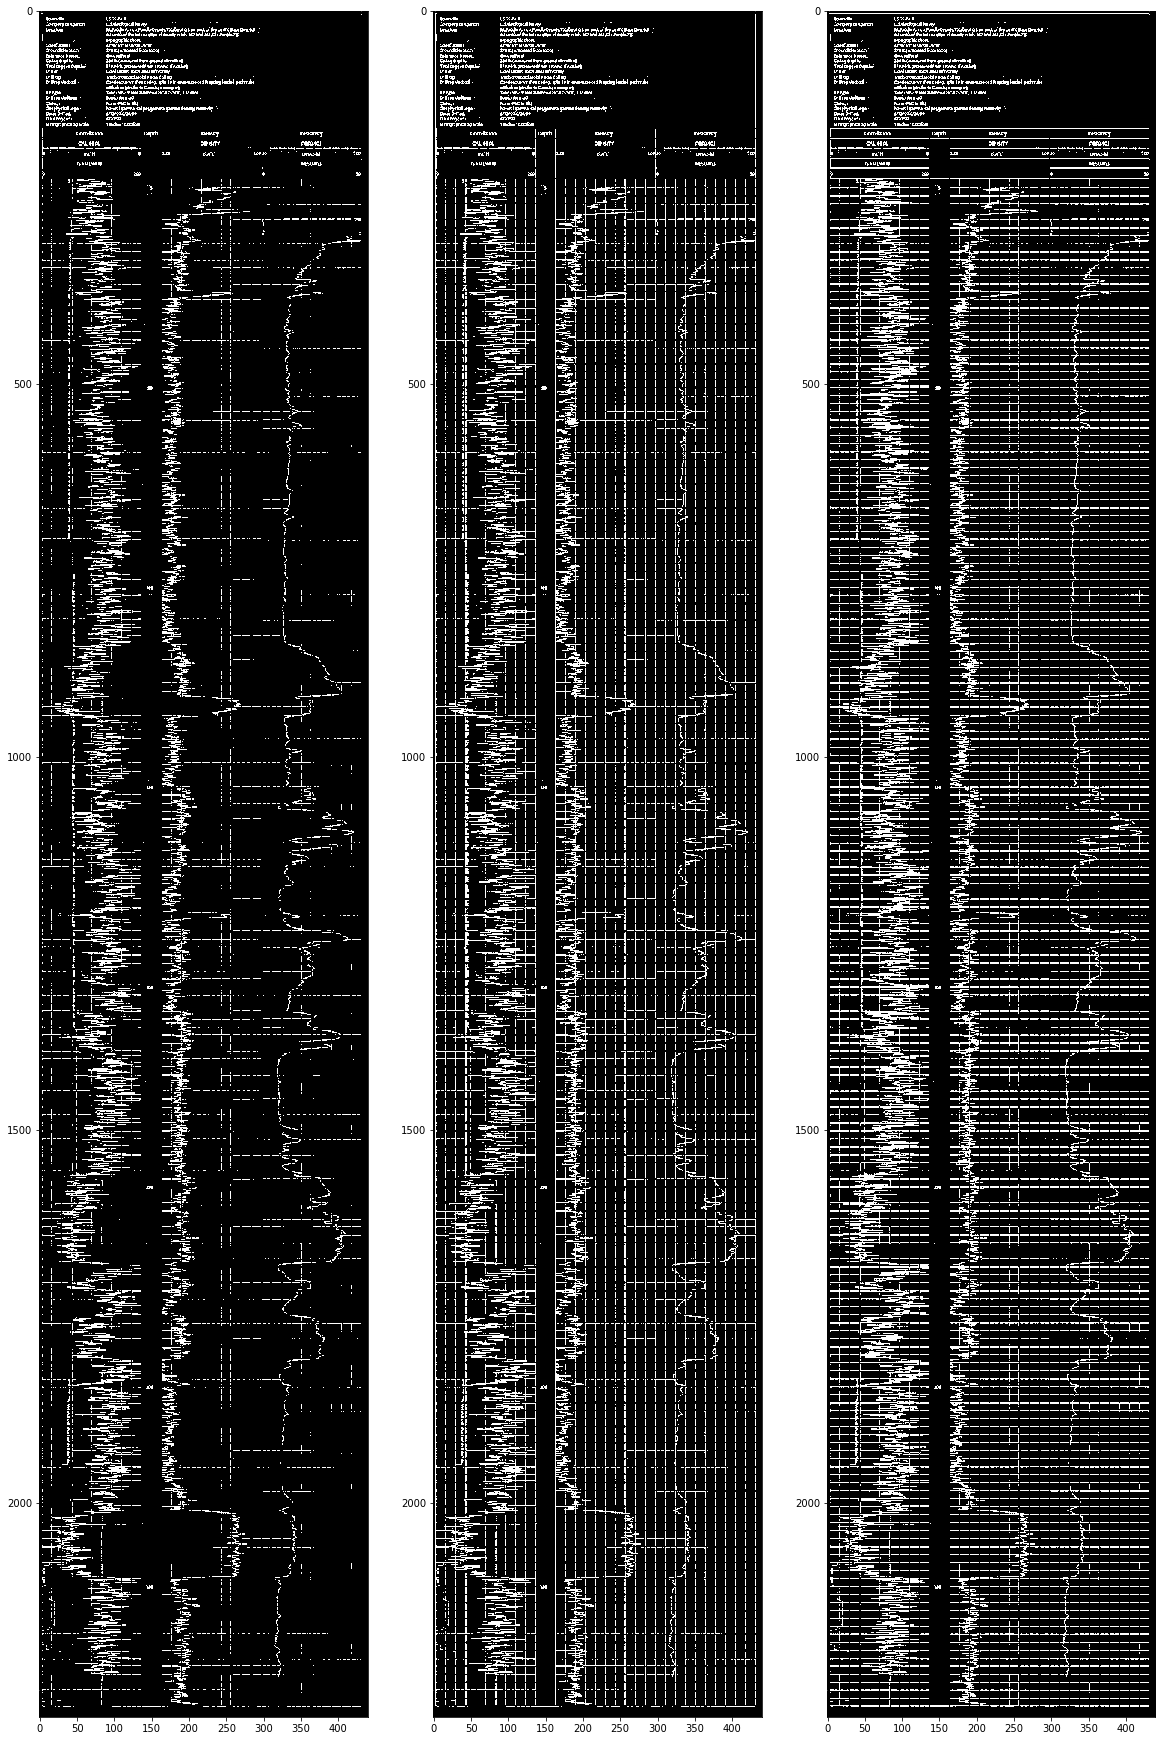

In [271]:
plt.figure(figsize=(20,40))

_ = plt.subplot(1,3,2)
_ = plt.imshow(new_hor, cmap='gray')

_ = plt.subplot(1,3,3)
_ = plt.imshow(new_ver, cmap='gray')

_ = plt.subplot(1,3,1)
_ = plt.imshow(new, cmap='gray')

In [ ]:
----------------------------------------------------------------

### Specify Structural Element: Horizontal and Vertical

In [380]:
def morph_horizontal(horizontal, horizontal_size, iterations):
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure, iterations)
    horizontal = cv2.dilate(horizontal, horizontalStructure, iterations)
    
    return(horizontal)

In [384]:
def morph_vertical(vertical, vertical_size, iterations):
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure, iterations)
    vertical = cv2.dilate(vertical, verticalStructure, iterations)
    
    return(vertical)

In [375]:
def create_horizontal_mask(horizontal):
    horizontal_mask_bool = horizontal==255 # True
    horizontal_mask_invert_bool = np.invert(horizontal_mask_bool)
    return(horizontal_mask_invert_bool)

In [376]:
def create_vertical_mask(vertical):
    vertical_mask_bool = vertical==255 # True
    vertical_mask_invert_bool = np.invert(vertical_mask_bool)
    return(vertical_mask_invert_bool)

In [377]:
def morph(bw, horizontal_size, vertical_size, iterations):
    
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    
    horizontal = morph_horizontal(horizontal, horizontal_size, iterations)
    vertical = morph_vertical(vertical, vertical_size, iterations)

    horizontal_mask_invert_bool = create_horizontal_mask(horizontal)
    vertical_mask_invert_bool = create_vertical_mask(vertical)
    
    new = bw * vertical_mask_invert_bool * horizontal_mask_invert_bool
    
    return(new)

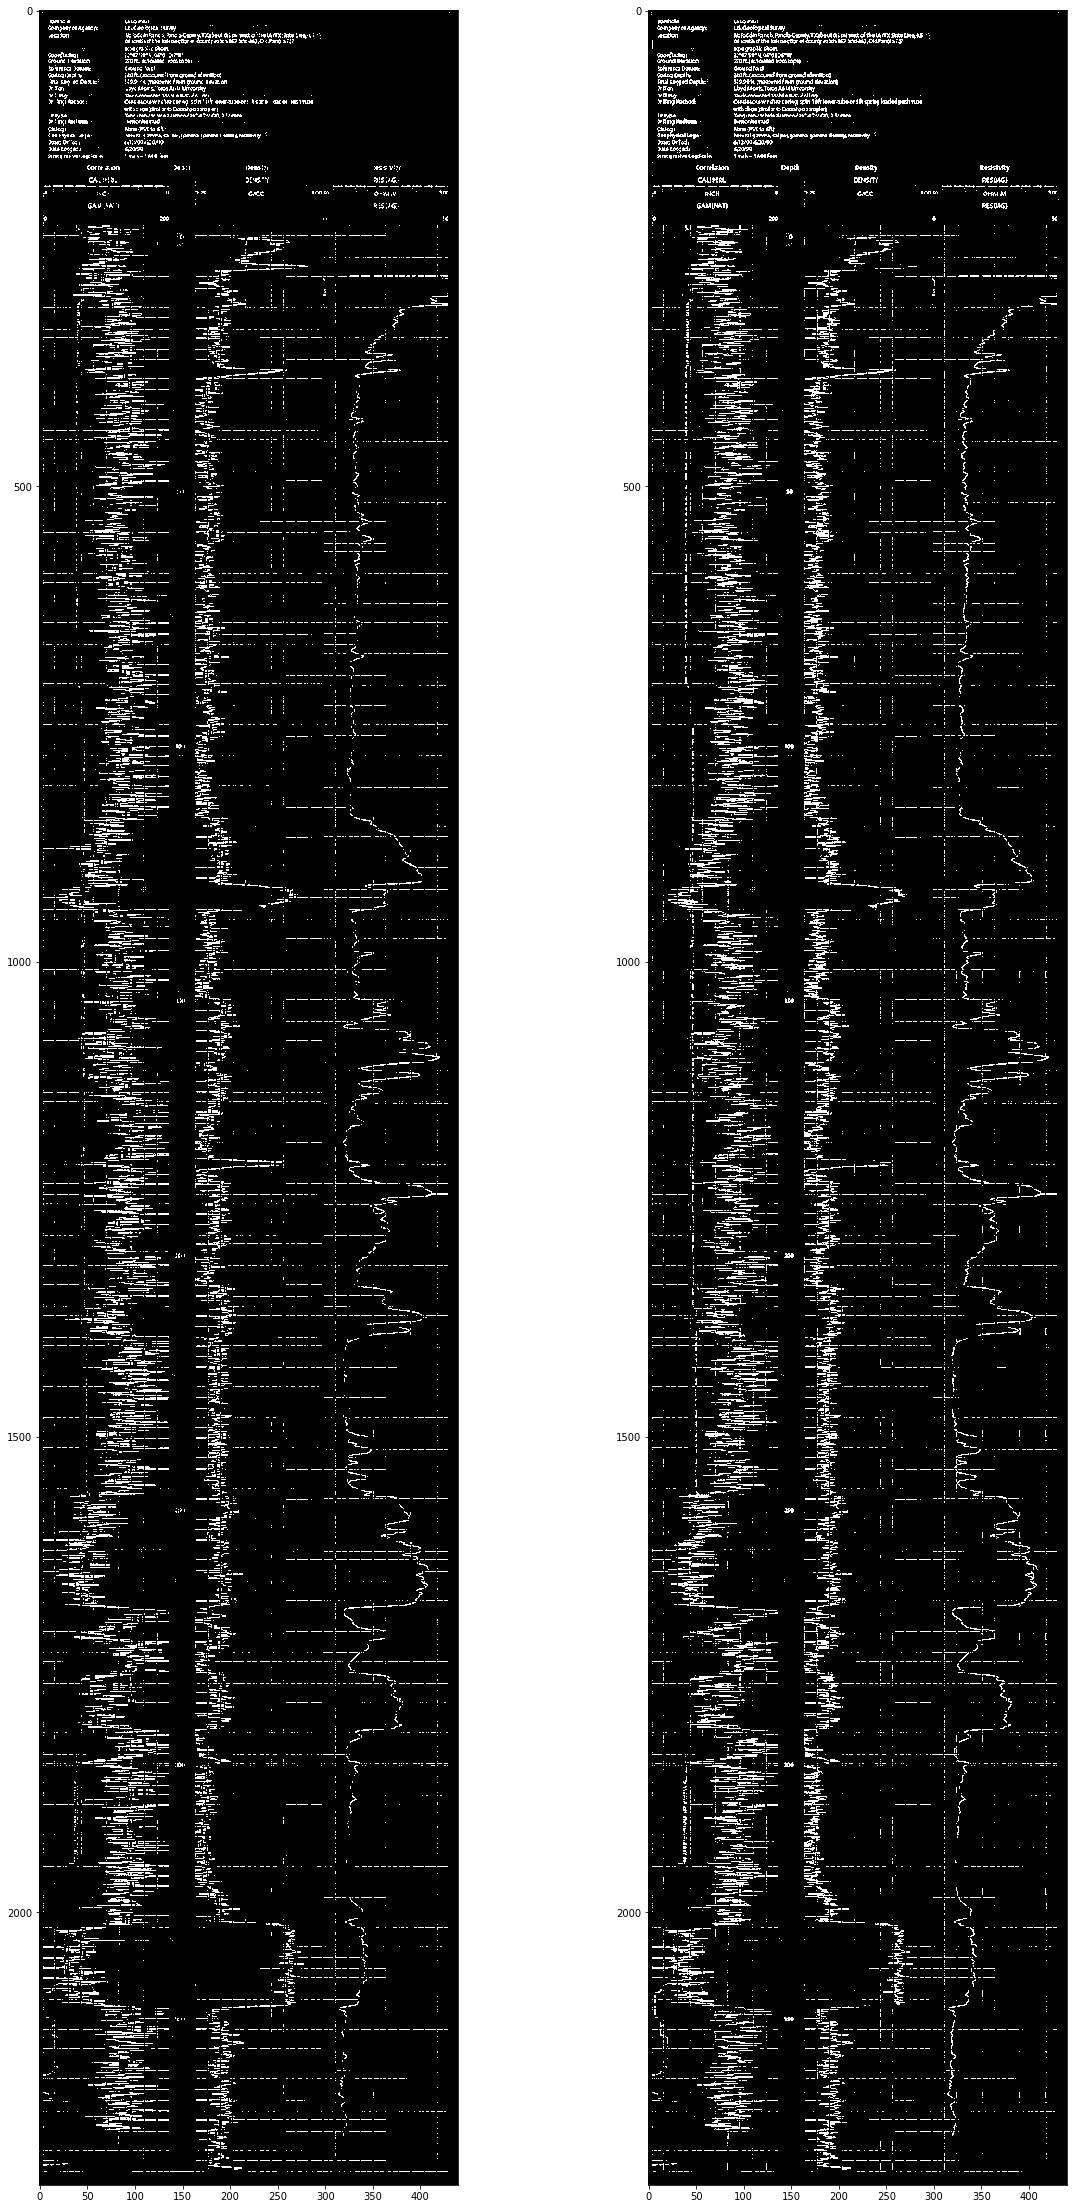

In [430]:
new = np.copy(bw)

horizontal_size = 40
vertical_size = 5
iterations = 1

_ = plt.figure(figsize=(20,40))

new = morph(new, horizontal_size, vertical_size, iterations)
_ = plt.subplot(1,2,1)
_ = plt.imshow(new, cmap='gray')

#########################

new = np.copy(bw)

horizontal_size = 30
vertical_size = 10
iterations = 100

new = morph(new, horizontal_size, vertical_size, iterations)
_ = plt.subplot(1,2,2)
_ = plt.imshow(new, cmap='gray')

### Remove salt and pepper noise

<Figure size 1440x2880 with 0 Axes>

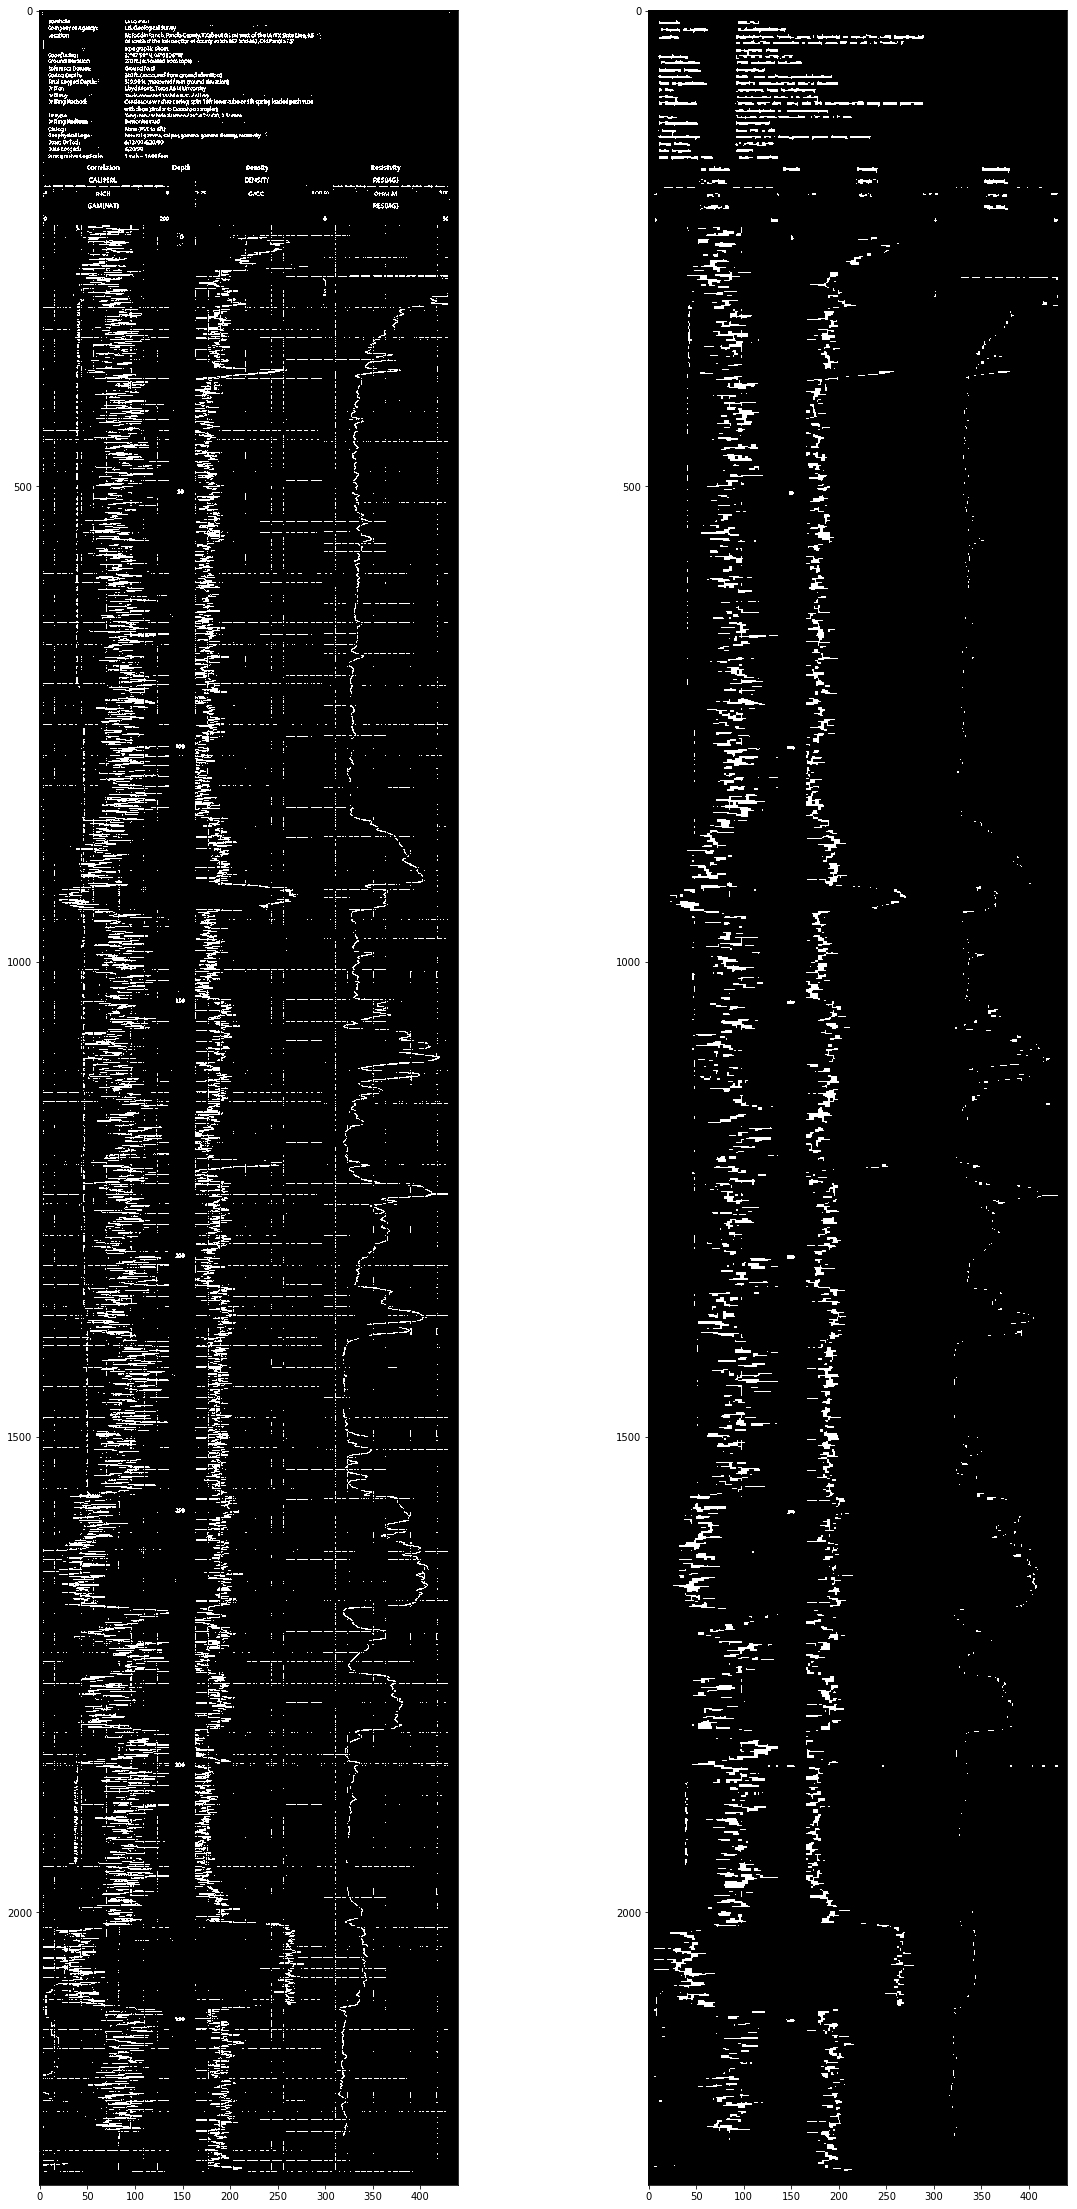

In [431]:
kernel = np.ones((2,2),np.uint8)

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(new, cmap='gray')

new = cv2.dilate(new, kernel, iterations=1)
new = cv2.erode(new, kernel, iterations=2)

_ = plt.subplot(1,2,2)
_ = plt.imshow(new, cmap='gray')


<Figure size 1440x2880 with 0 Axes>

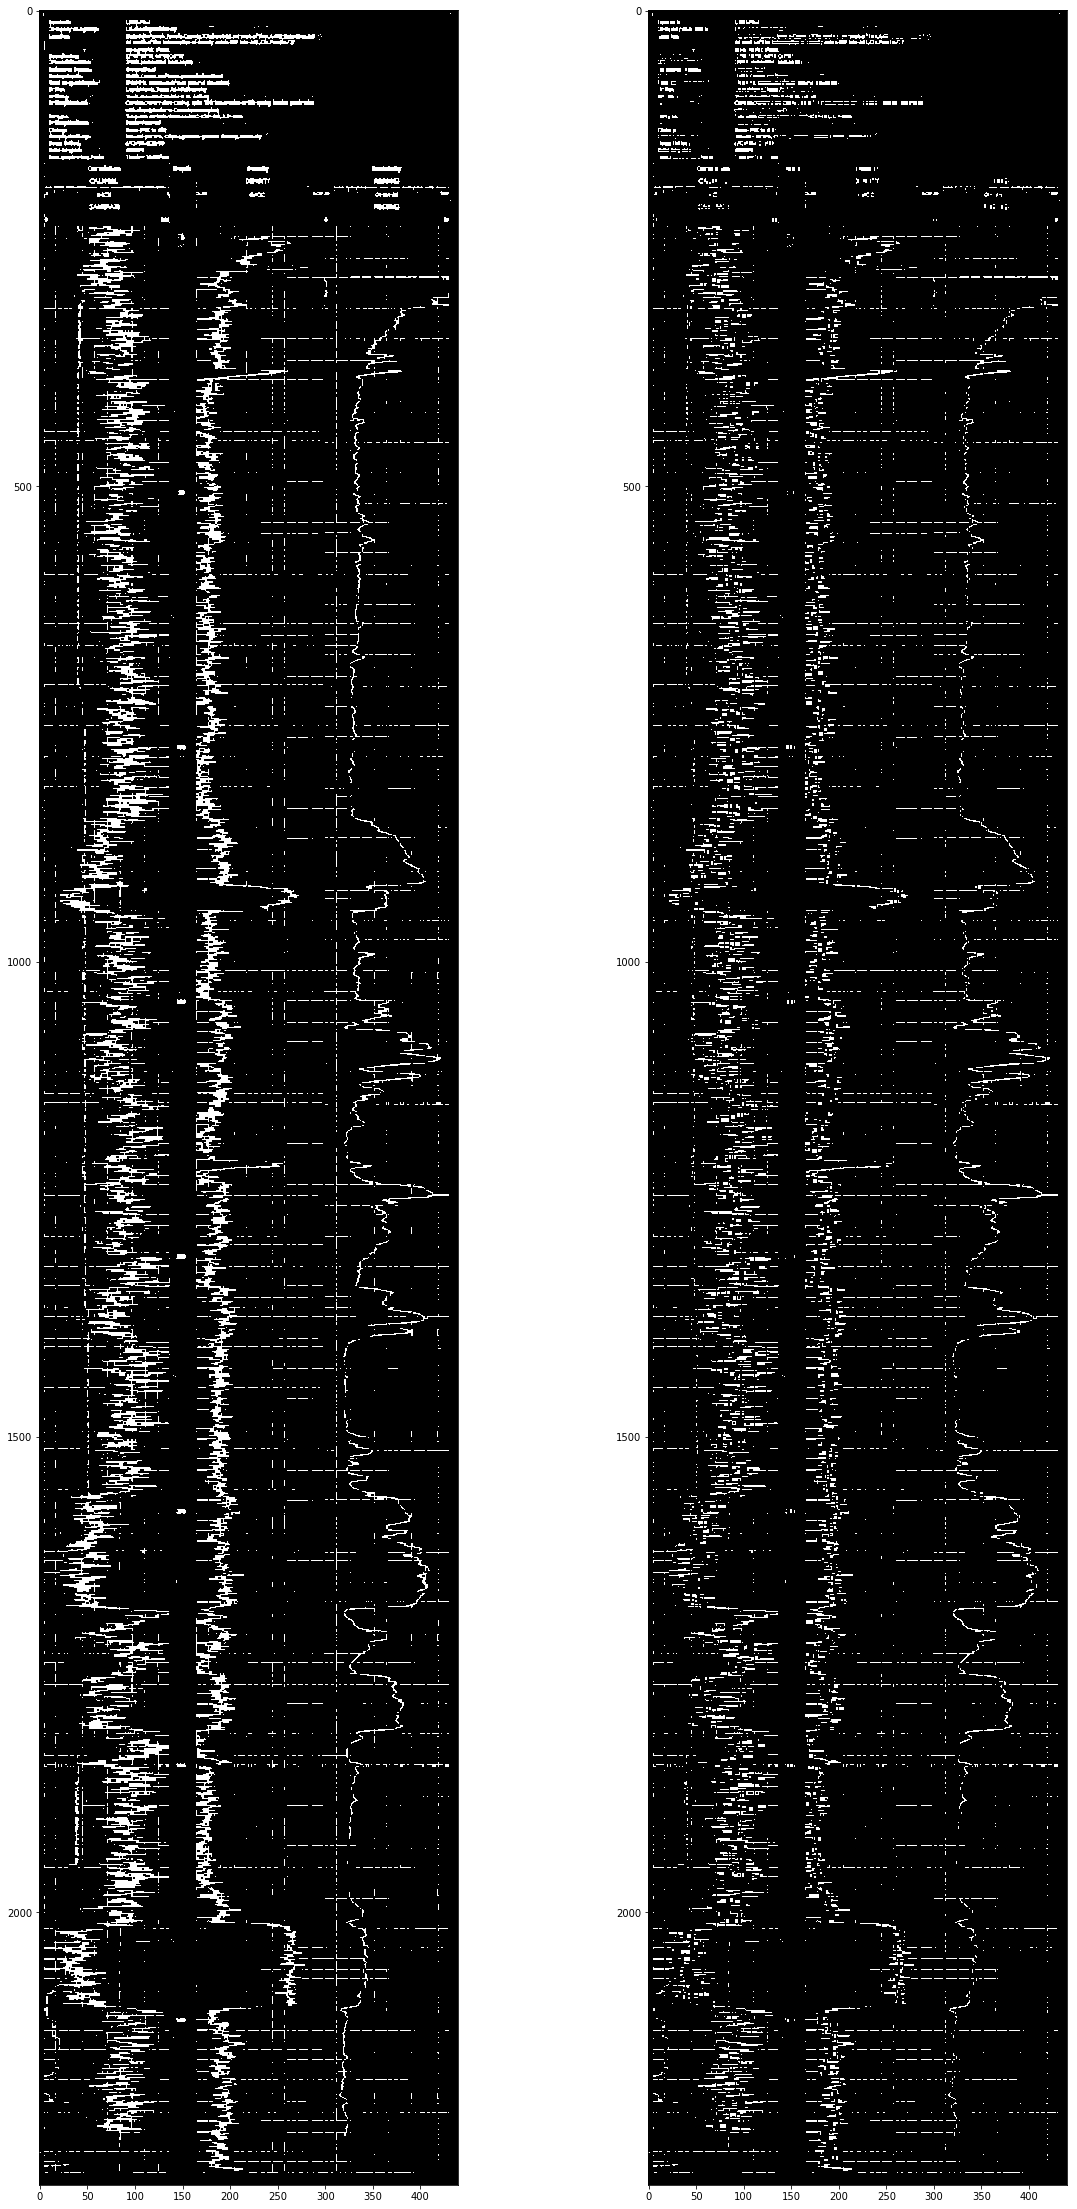

In [418]:
horizontal_size = 30
vertical_size = 5
iterations = 1

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(new, cmap='gray')

new = morph(new, horizontal_size, vertical_size, iterations)
_ = plt.subplot(1,2,2)
_ = plt.imshow(new, cmap='gray')

In [ ]:
-------------------------------------------------------

### By means of Histogram: vertical lines

In [451]:
bw.shape
vertSum = np.sum(bw,0)
horzSum = np.sum(bw,1)

(2287, 440)

<Figure size 1440x360 with 0 Axes>

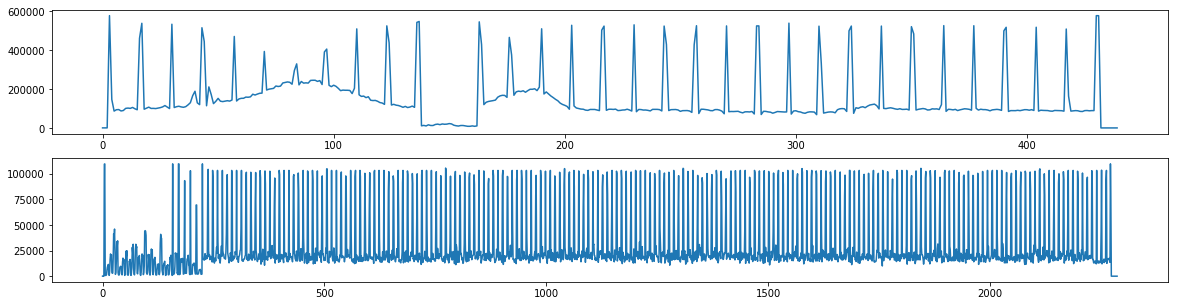

In [452]:
plt.figure(figsize=(20, 5))

plt.subplot(2,1,1)
plt.plot(vertSum)

plt.subplot(2,1,2)
plt.plot(horzSum)


In [553]:
window_size = 10
vertMedian = np.zeros(0)

for i in range(len(vertSum)):
    vertMedian = np.append(vertMedian, stats.median(vertSum[i:i+window_size])) # note the tail will be taking less than 10 elements

In [554]:
vertDelta = 0.25
vertKeep_mask = vertSum <= (vertMedian + vertMedian*vertDelta); vertKeep

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [555]:
vert_keep = vertSum * vertKeep_mask; #vert_keep

vert_keep = vert_keep.astype('float')

vert_keep[vert_keep==0] = np.nan; #vert_keep

#vert_keep 

In [558]:
not_nan = np.logical_not(np.isnan(vert_keep))
indices = np.arange(len(vert_keep))
vert_keep_interp = np.interp(indices, indices[not_nan], vert_keep[not_nan])

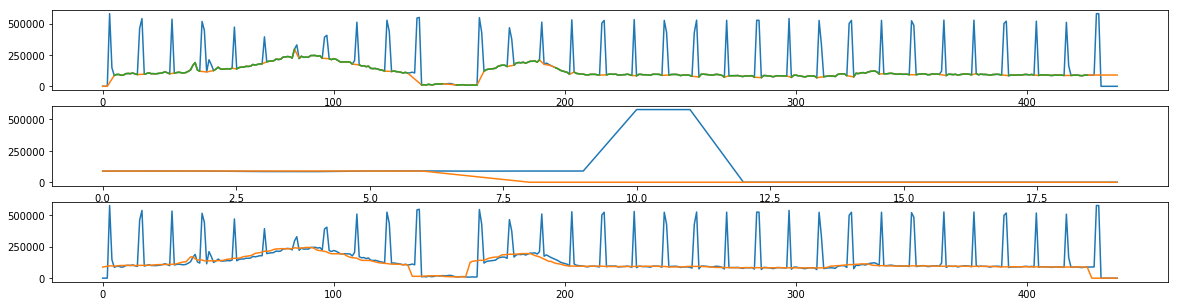

In [588]:
_ = plt.figure(figsize=(20, 5))

_ = plt.subplot(3,1,1)
_ = plt.plot(vertSum)
_ = plt.plot(vert_keep_interp)
_ = plt.plot(vert_keep)

_ = plt.subplot(3,1,2)
_ = plt.plot(vertSum[-20:])
_ = plt.plot(vertMedian[-20:])

_ = plt.subplot(3,1,3)
_ = plt.plot(vertSum)
_ = plt.plot(vertMedian)


In [590]:
vertKeepInterp_mask = vertSum <= vert_keep_interp; #vertKeepInterp_mask
vertKeepInterp_mask.shape

(440,)

### Display

<Figure size 1440x2880 with 0 Axes>

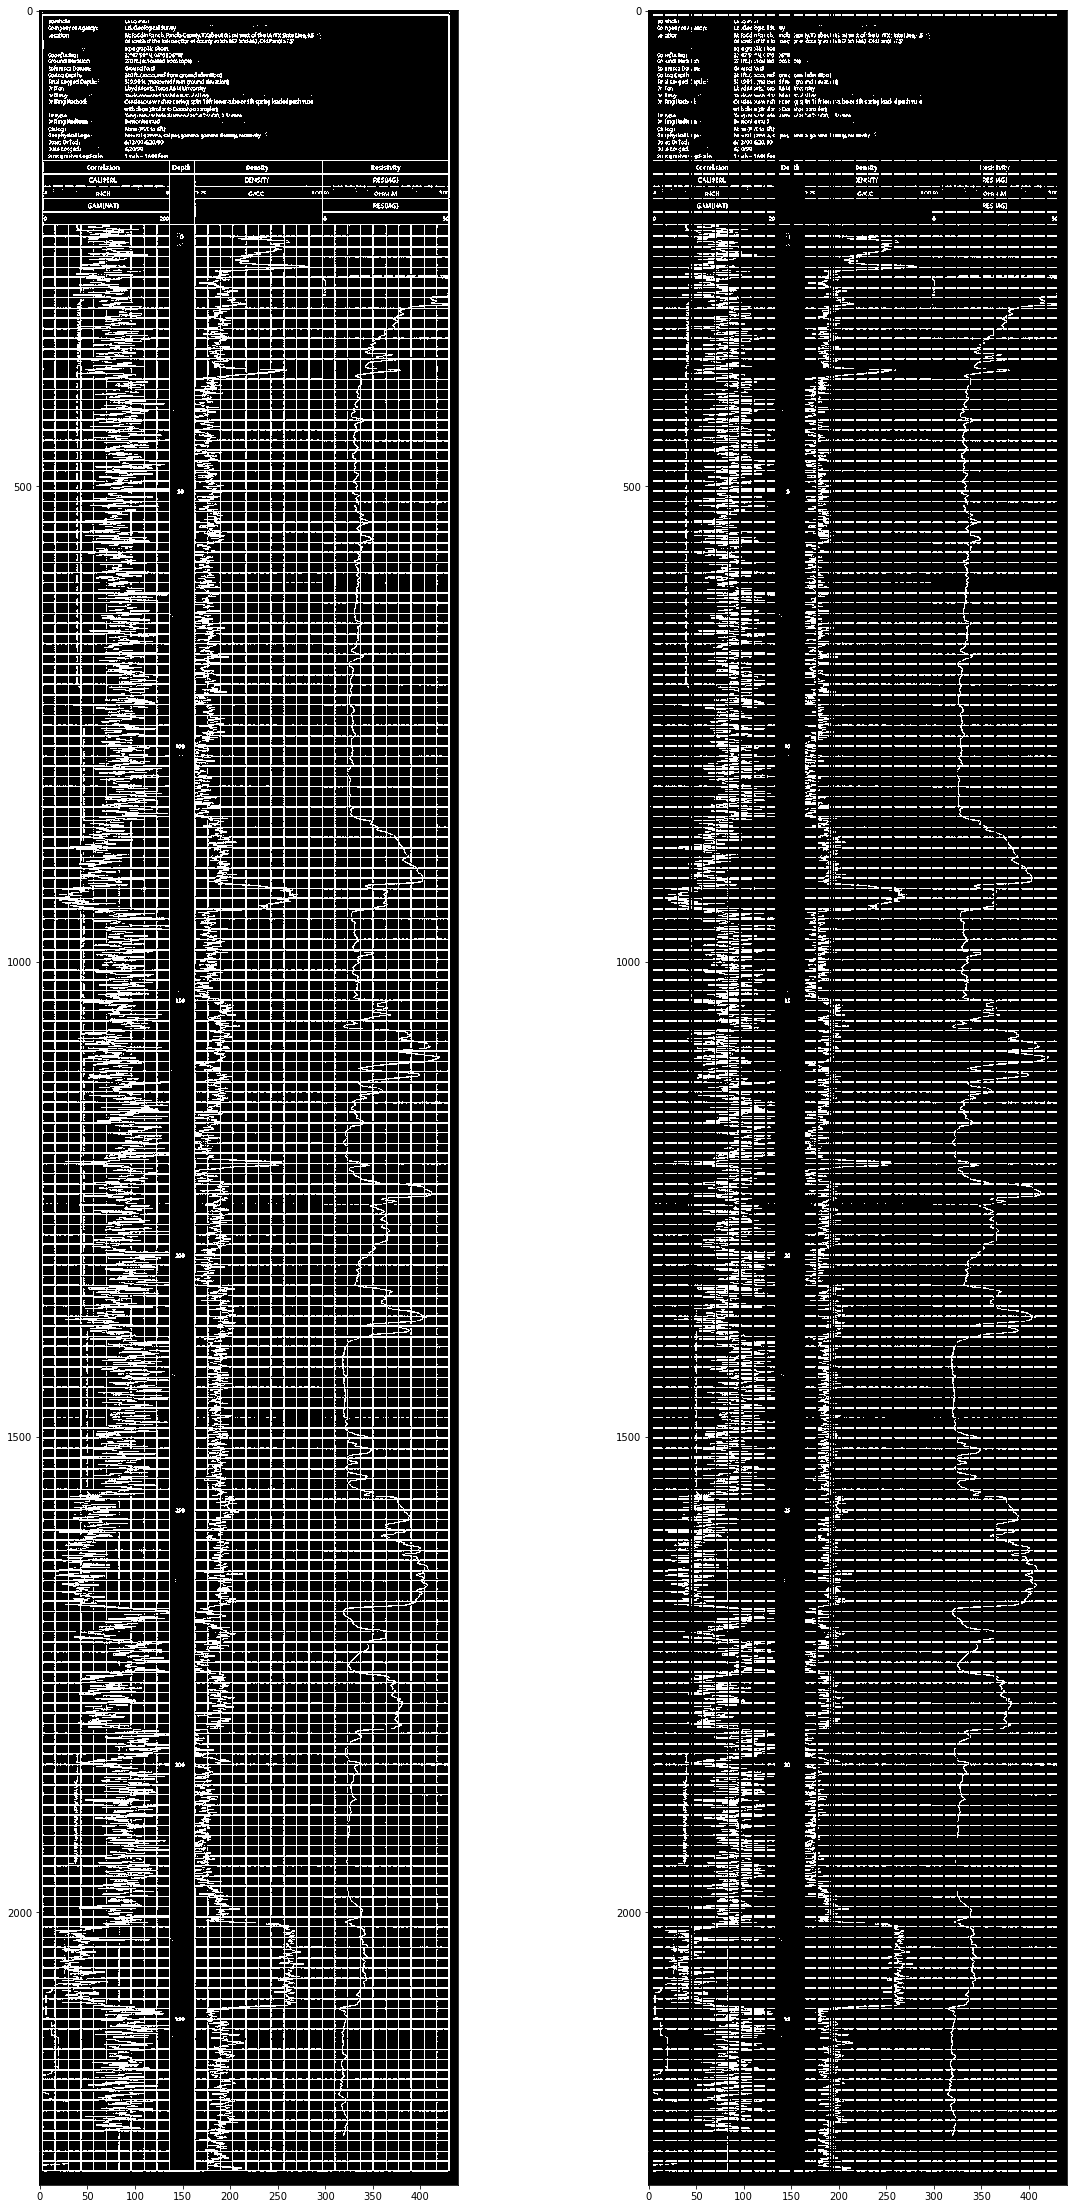

In [591]:
new2 = bw * vertKeepInterp_mask

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(bw, cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.imshow(new2, cmap='gray')

### By means of Histogram: horizontal lines

In [580]:
bw.shape
vertSum = np.sum(bw,0)
horzSum = np.sum(bw,1)

(2287, 440)

In [581]:
window_size = 10
horzMedian = np.zeros(0)

for i in range(len(horzSum)):
    horzMedian = np.append(horzMedian, stats.median(horzSum[i:i+window_size])) # note the tail will be taking less than 10 elements

In [582]:
horzDelta = 0.25
horzKeep_mask = horzSum <= (horzMedian + horzMedian*horzDelta)

In [583]:
horz_keep = horzSum * horzKeep_mask; #horz_keep

horz_keep = horz_keep.astype('float')

horz_keep[horz_keep==0] = np.nan; #horz_keep

In [584]:
not_nan = np.logical_not(np.isnan(horz_keep))
indices = np.arange(len(horz_keep))
horz_keep_interp = np.interp(indices, indices[not_nan], horz_keep[not_nan])

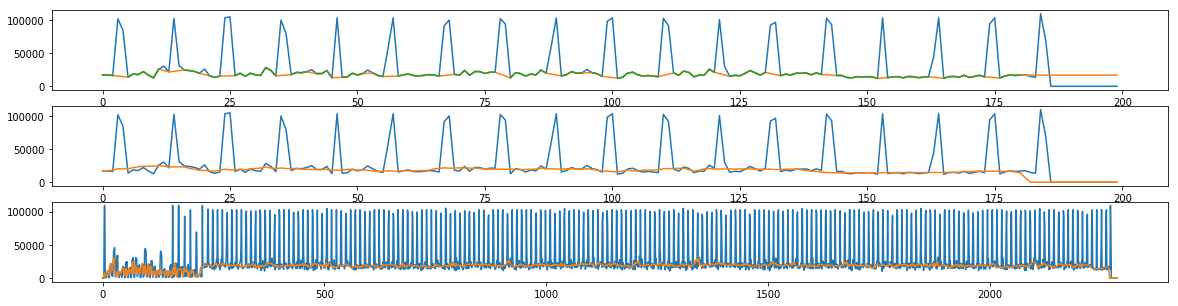

In [585]:
_ = plt.figure(figsize=(20, 5))

_ = plt.subplot(3,1,1)
_ = plt.plot(horzSum[-200:])
_ = plt.plot(horz_keep_interp[-200:])
_ = plt.plot(horz_keep[-200:])

_ = plt.subplot(3,1,2)
_ = plt.plot(horzSum[-200:])
_ = plt.plot(horzMedian[-200:])

_ = plt.subplot(3,1,3)
_ = plt.plot(horzSum)
_ = plt.plot(horzMedian)


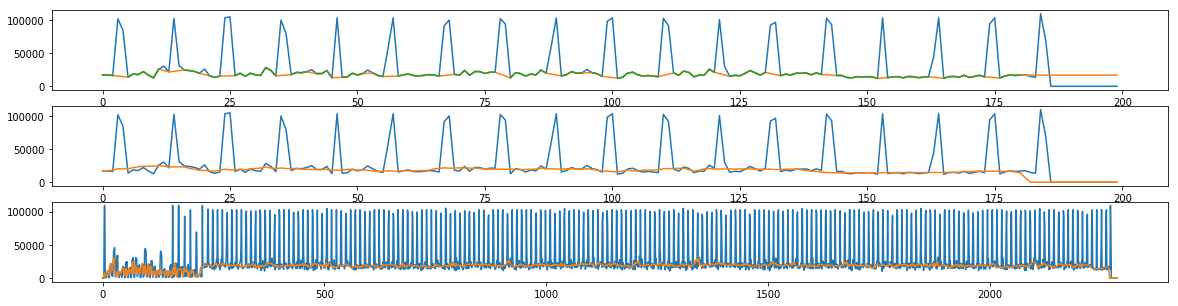

In [585]:
_ = plt.figure(figsize=(20, 5))

_ = plt.subplot(3,1,1)
_ = plt.plot(vertSum[-200:])
_ = plt.plot(vert_keep_interp[-200:])
_ = plt.plot(vert_keep[-200:])

_ = plt.subplot(3,1,2)
_ = plt.plot(vertSum[-200:])
_ = plt.plot(vertMedian[-200:])

_ = plt.subplot(3,1,3)
_ = plt.plot(vertSum)
_ = plt.plot(vertMedian)


In [599]:
horzKeepInterp_mask = horzSum <= horz_keep_interp; horzKeepInterp_mask.shape #horzKeepInterp_mask

(2287,)

### Display

<Figure size 1440x2880 with 0 Axes>

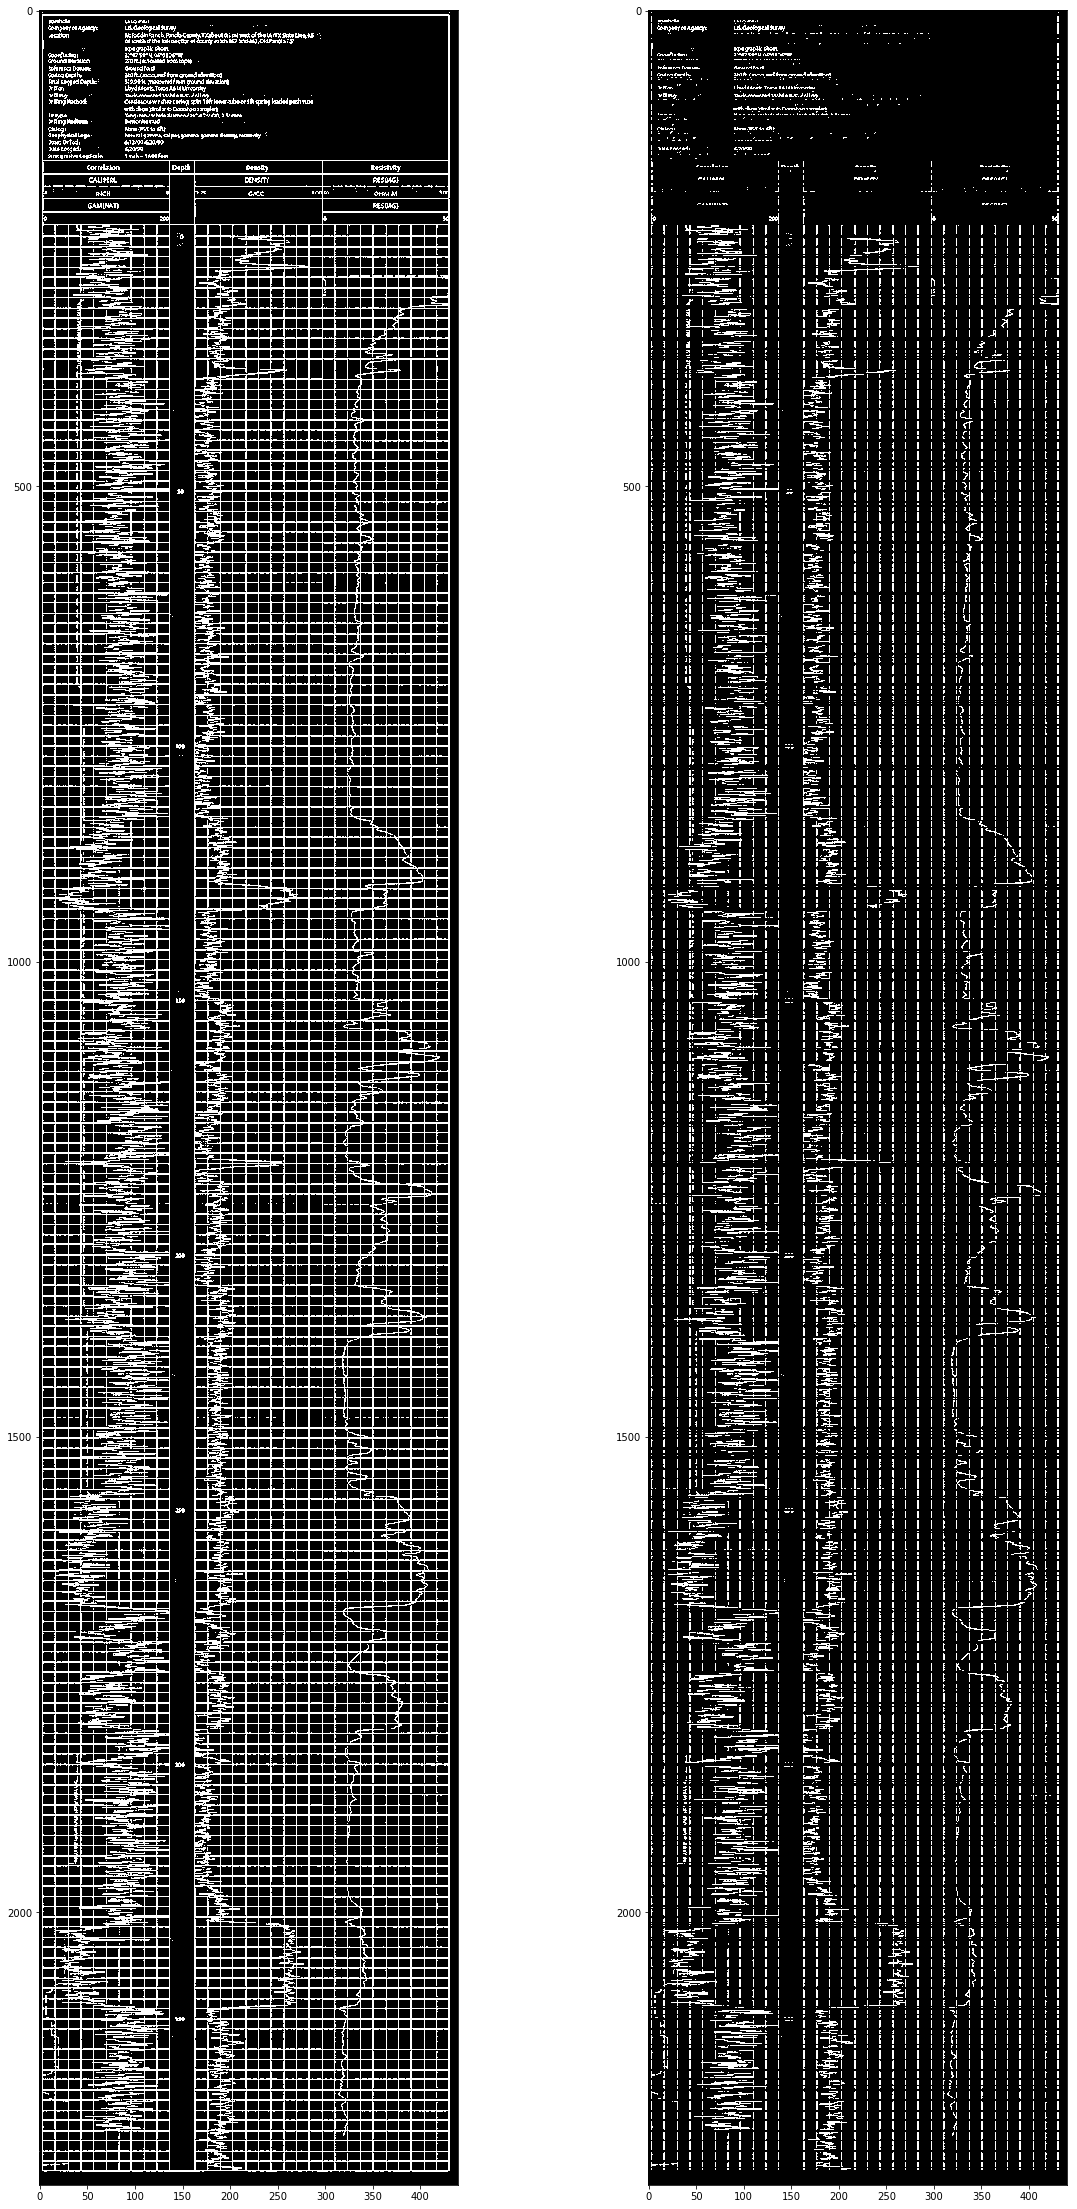

In [602]:
new2 = bw.T * horzKeepInterp_mask

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(bw, cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.imshow(new2.T, cmap='gray')

In [ ]:
----------------

### By means of Histogram: vertical and horizontal lines

In [603]:
bw.shape
vertSum = np.sum(bw,0)
horzSum = np.sum(bw,1)

(2287, 440)

In [618]:
def interpolate(histogram, histoKeep_mask):

    histo_keep = histogram * histoKeep_mask; 
    histo_keep = histo_keep.astype('float')
    histo_keep[histo_keep==0] = np.nan; 
    
    not_nan = np.logical_not(np.isnan(histo_keep))
    indices = np.arange(len(histo_keep))
    histo_keep_interp = np.interp(indices, indices[not_nan], histo_keep[not_nan])
    
    return(histo_keep_interp)

In [619]:
def getMask(window_size, delta, histogram):
    
    histoMedian = np.zeros(0)

    for i in range(len(histogram)):
        histoMedian = np.append(histoMedian, stats.median(histogram[i:i+window_size])) # note the tail will be taking less than 10 elements

    histoKeep_mask = histogram <= (histoMedian + histoMedian*delta)
    
    histo_keep_interp = interpolate(histogram, histoKeep_mask)
    
    return(histo_keep_interp)

In [620]:
def removeLines(window_size, delta, histogram):
    histo_keep_interp = getMask(window_size, delta, histogram)
    histoKeepInterp_mask = histogram <= histo_keep_interp; 
    return(histoKeepInterp_mask)

window_size = 10
delta = 0.25
histogram = horzSum

horzKeepInterp_mask= removeLines(window_size, delta, histogram)

window_size = 10
delta = 0.25
histogram = vertSum

vertKeepInterp_mask= removeLines(window_size, delta, histogram)

In [623]:
window_size = 10
delta = 0.25

for [h, mask] in zip([horzSum, vertSum],[horzKeepInterp_mask, vertKeepInterp_mask]):
    mask = removeLines(window_size, delta, h)

### Display

<Figure size 1440x2880 with 0 Axes>

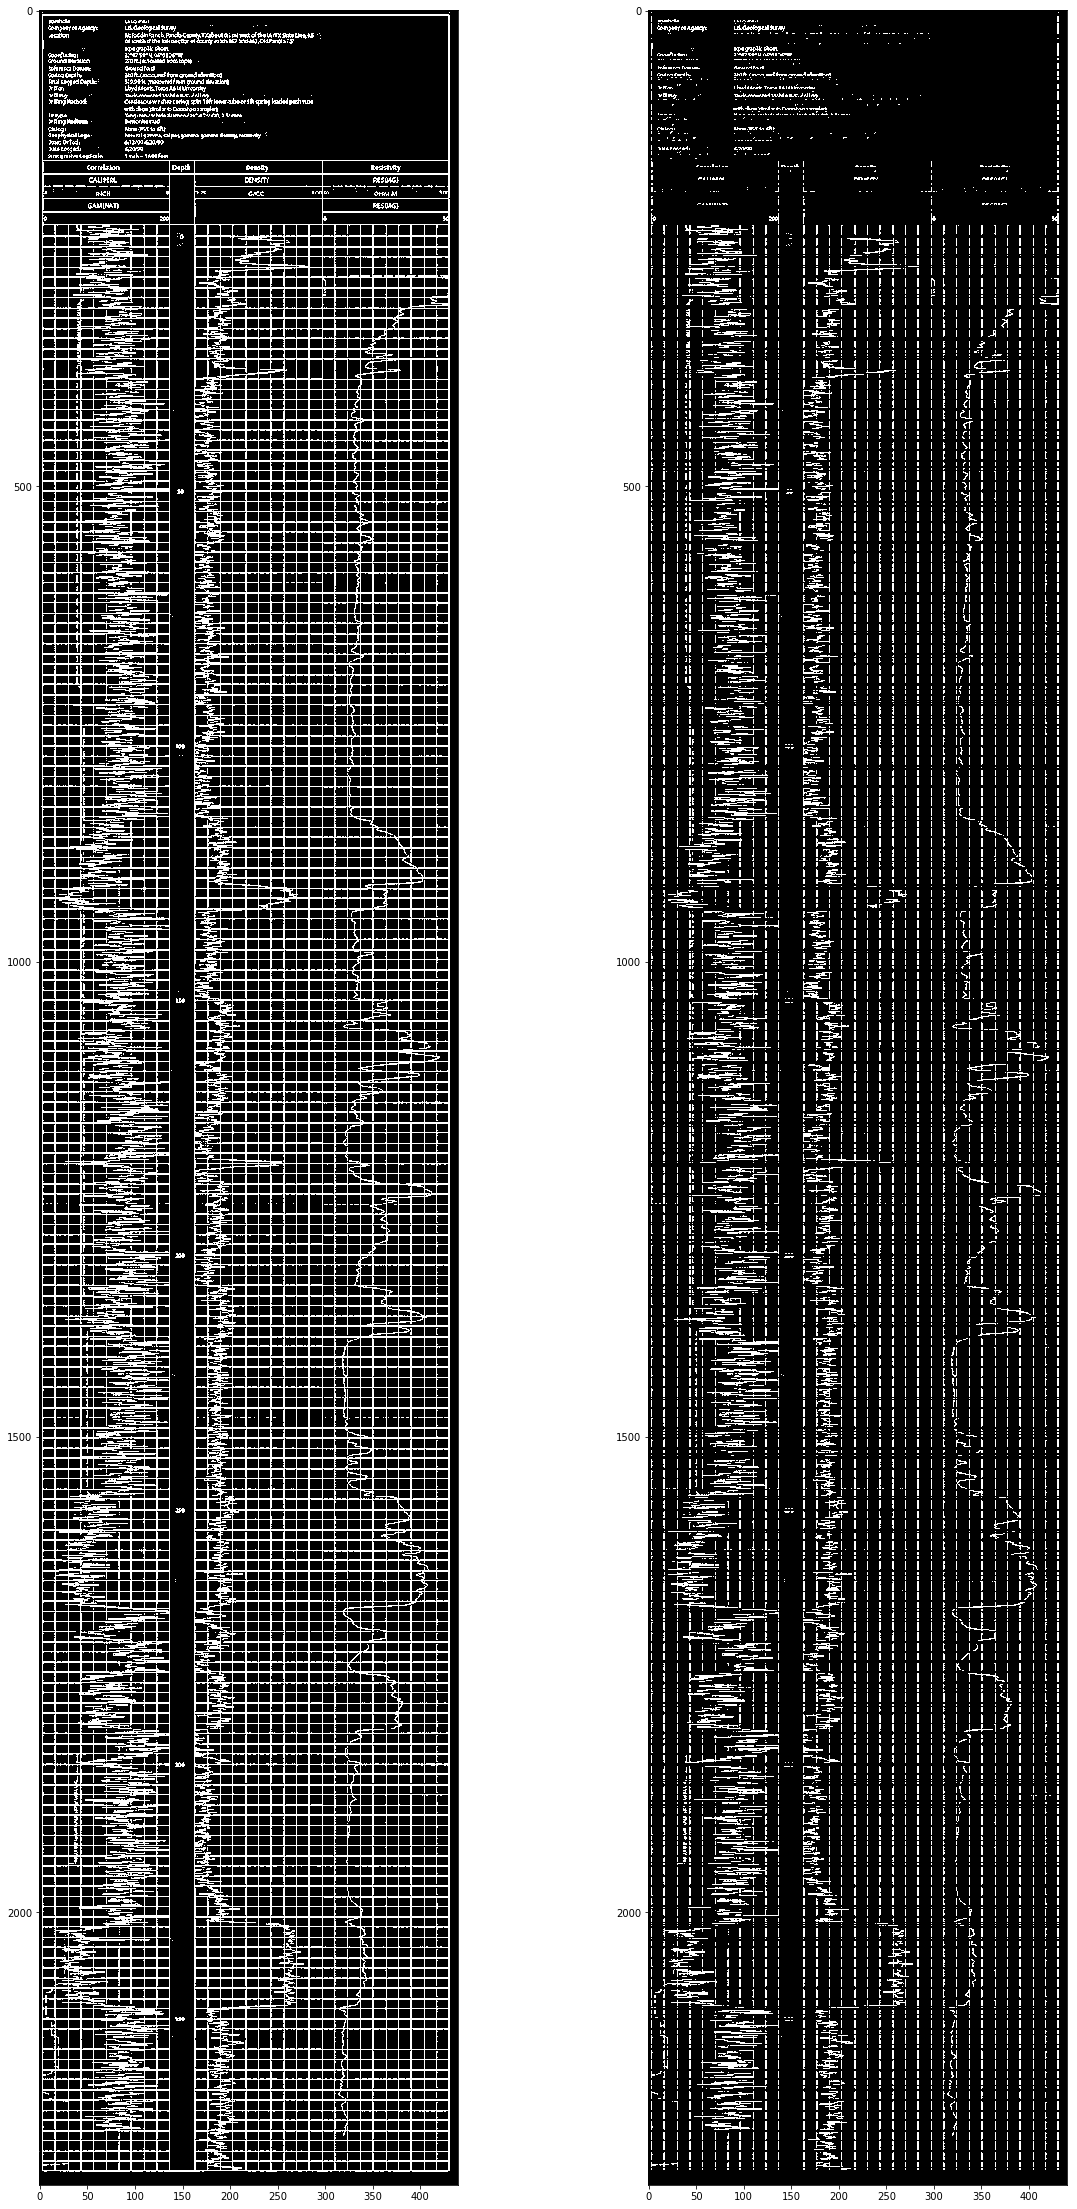

In [616]:
new2 = bw.T * horzKeepInterp_mask

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(bw, cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.imshow(new2.T, cmap='gray')

<Figure size 1440x2880 with 0 Axes>

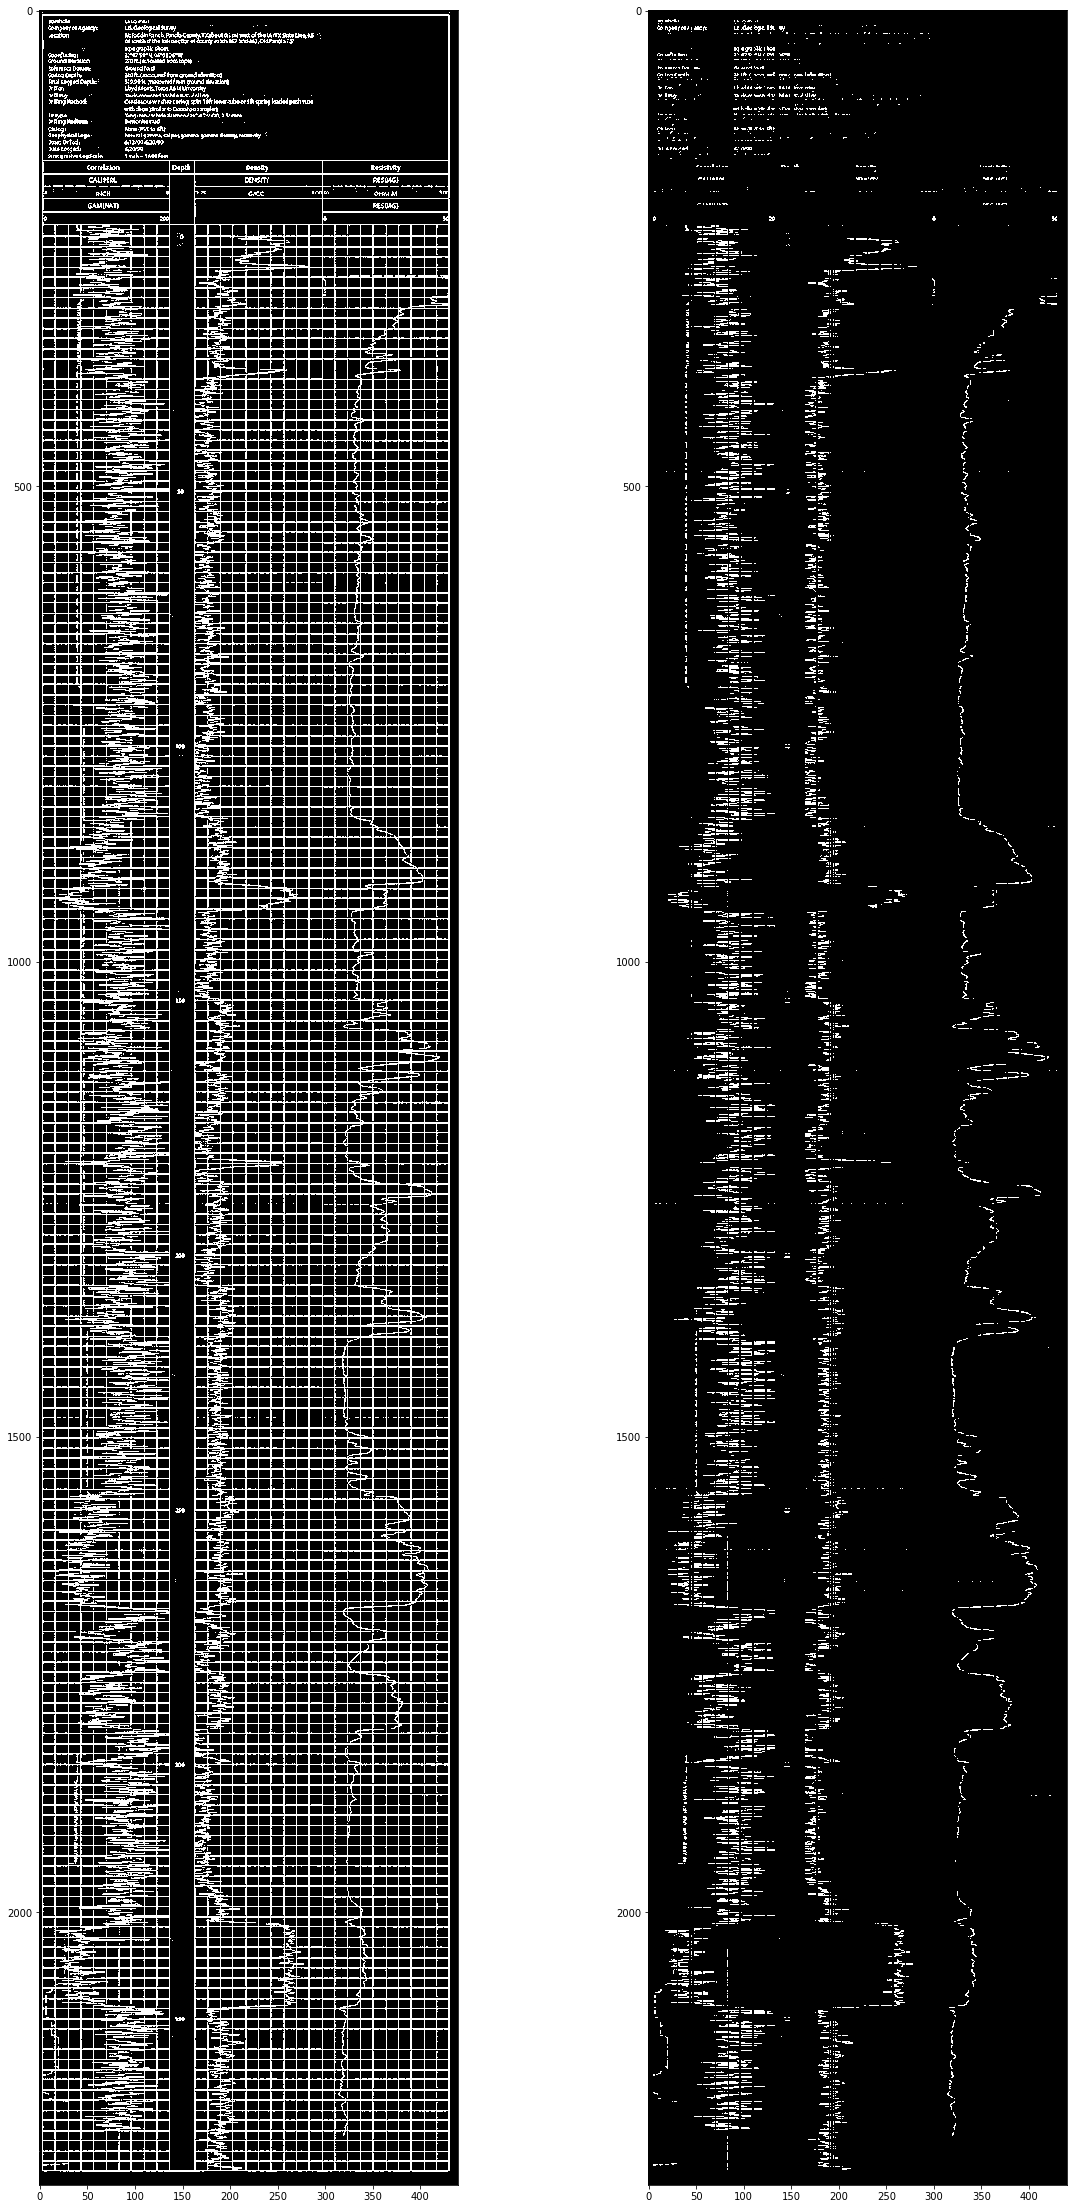

In [624]:
new2 = bw * vertKeepInterp_mask
new2 = new2.T * horzKeepInterp_mask

plt.figure(figsize=(20,40))

_ = plt.subplot(1,2,1)
_ = plt.imshow(bw, cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.imshow(new2.T, cmap='gray')

### Morph

<Figure size 1440x2880 with 0 Axes>

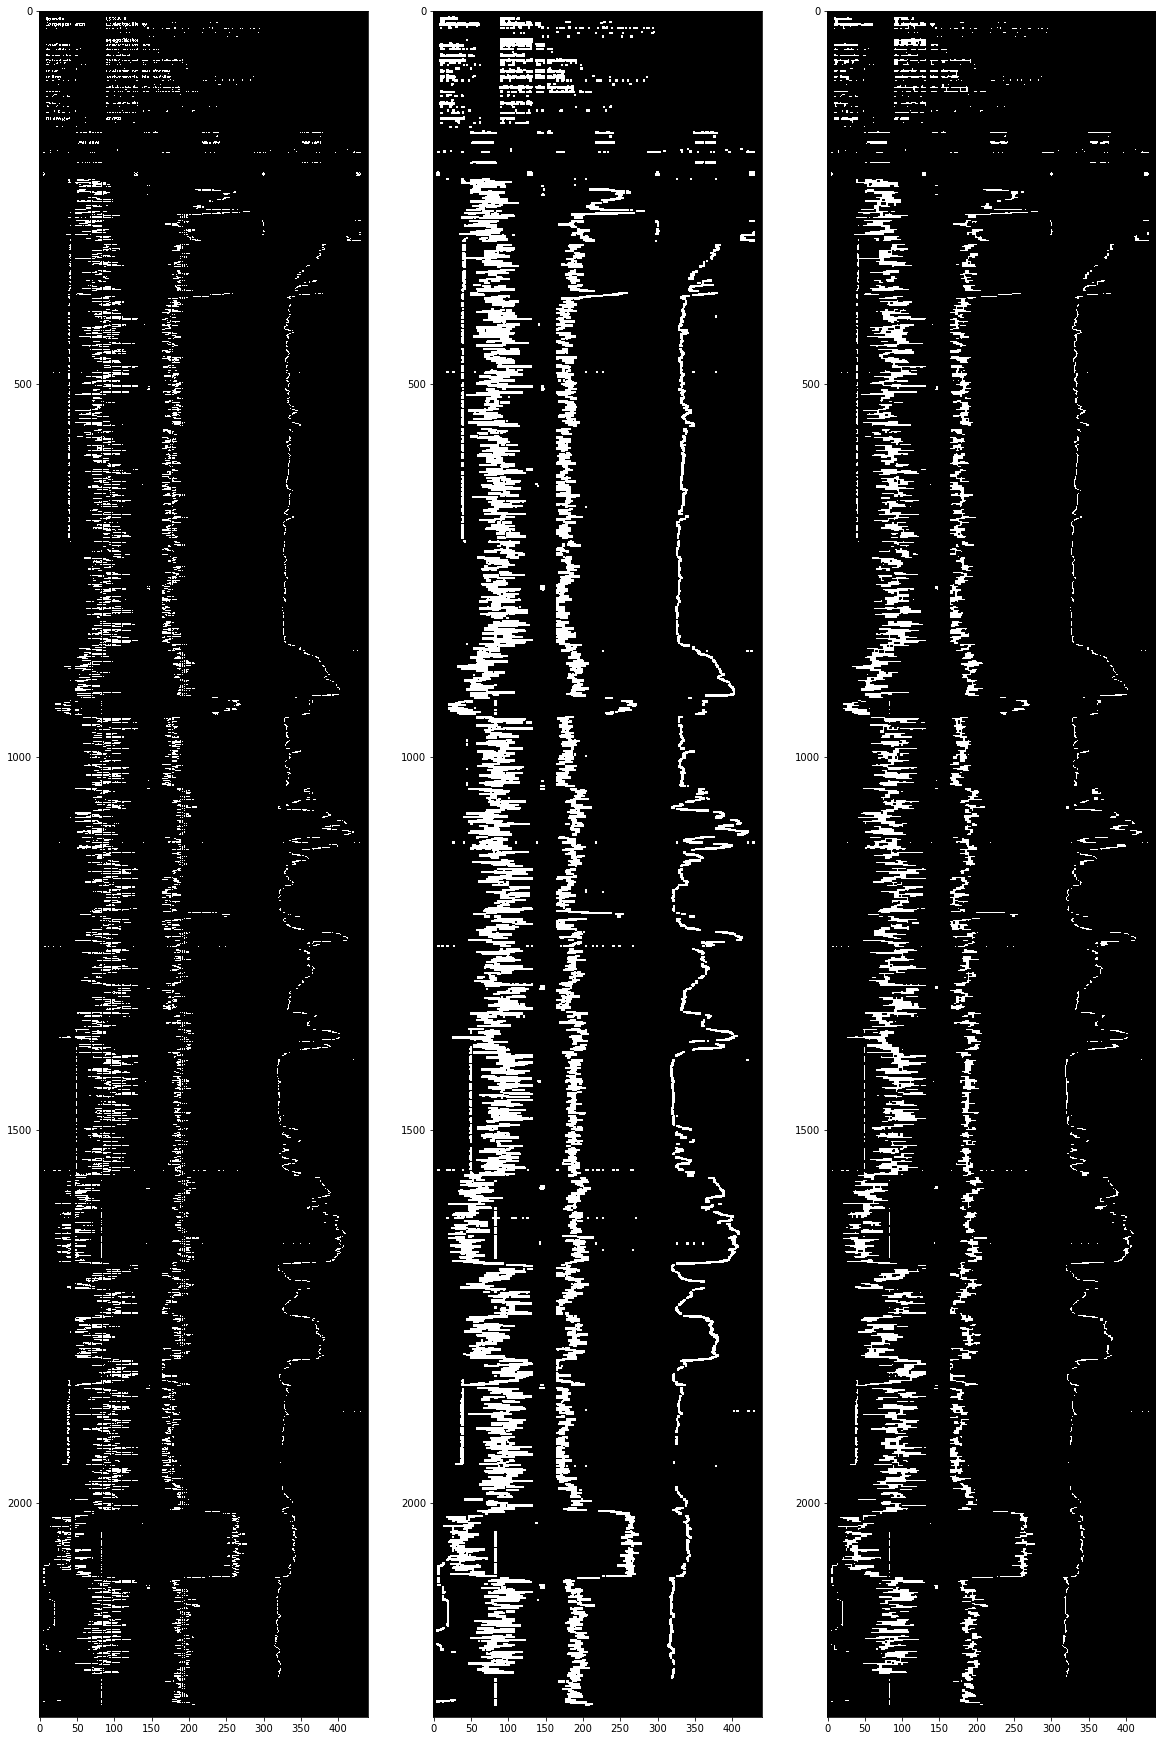

In [633]:
new3 = np.copy(new2.T)

kernel = np.ones((3,3),np.uint8)

plt.figure(figsize=(20,40))

_ = plt.subplot(1,3,1)
_ = plt.imshow(new3, cmap='gray')

new3 = cv2.dilate(new3, kernel, iterations=1)
new3 = cv2.erode(new3, kernel, iterations=0)

_ = plt.subplot(1,3,2)
_ = plt.imshow(new3, cmap='gray')

new3 = cv2.dilate(new3, kernel, iterations=0)
new3 = cv2.erode(new3, kernel, iterations=1)

_ = plt.subplot(1,3,3)
_ = plt.imshow(new3, cmap='gray')

<Figure size 1440x2880 with 0 Axes>

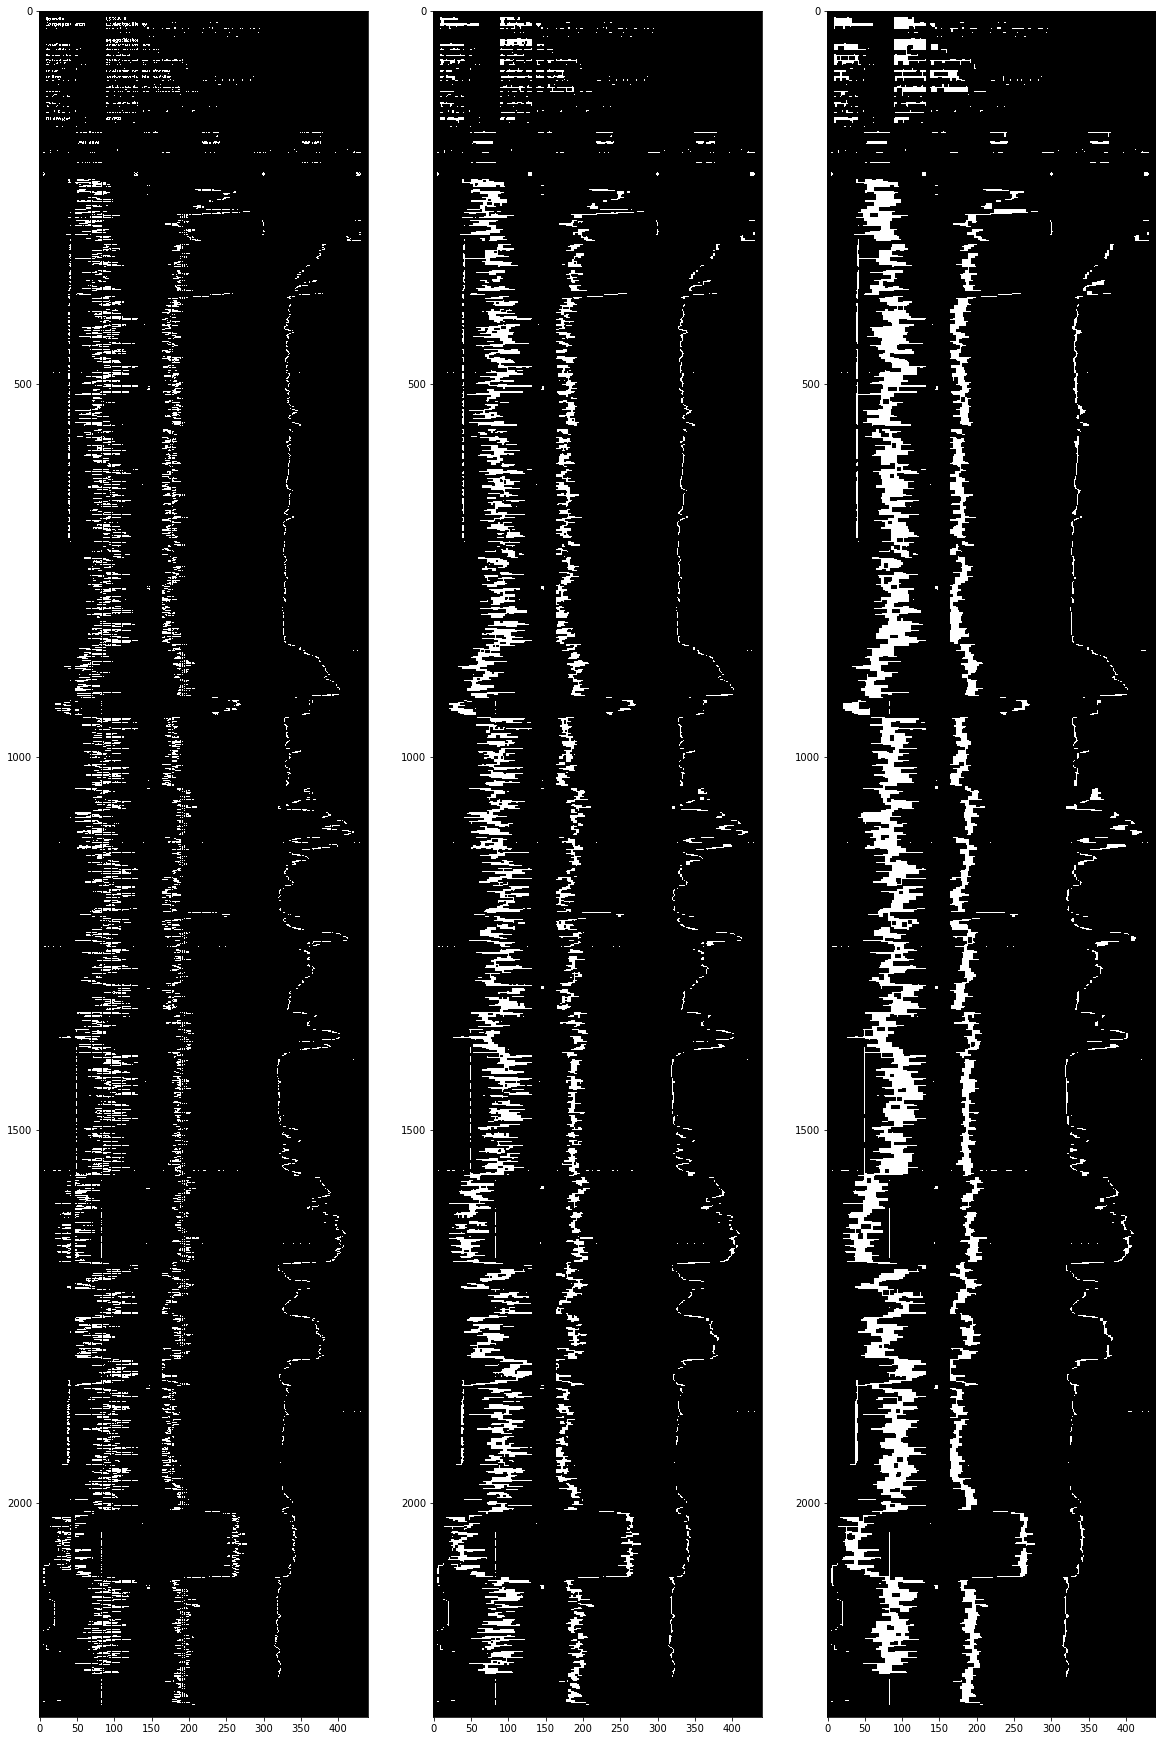

In [638]:
new3 = np.copy(new2.T)

kernel = np.ones((3,3),np.uint8)

plt.figure(figsize=(20,40))

_ = plt.subplot(1,3,1)
_ = plt.imshow(new3, cmap='gray')

new3 = cv2.dilate(new3, kernel, iterations=1)
new3 = cv2.erode(new3, kernel, iterations=1)

_ = plt.subplot(1,3,2)
_ = plt.imshow(new3, cmap='gray')

new3 = cv2.dilate(new3, kernel, iterations=2)
new3 = cv2.erode(new3, kernel, iterations=2)

_ = plt.subplot(1,3,3)
_ = plt.imshow(new3, cmap='gray')